In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 경로에 맞게 CSV 불러오기
file_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/segment_회원정보_상관계수_0.3이상.csv"
df = pd.read_csv(file_path)

print("불러온 데이터 shape:", df.shape)
display(df.info())


불러온 데이터 shape: (1544292, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1544292 entries, 0 to 1544291
Data columns (total 15 columns):
 #   Column         Non-Null Count    Dtype
---  ------         --------------    -----
 0   이용금액_R3M_신용체크  1544292 non-null  int64
 1   이용금액_R3M_신용    1544292 non-null  int64
 2   _1순위카드이용금액     1544292 non-null  int64
 3   _2순위카드이용금액     1544292 non-null  int64
 4   이용카드수_신용체크     1544292 non-null  int64
 5   이용카드수_신용       1544292 non-null  int64
 6   _2순위카드이용건수     1544292 non-null  int64
 7   _1순위카드이용건수     1544292 non-null  int64
 8   이용가능카드수_신용체크   1544292 non-null  int64
 9   이용가능카드수_신용     1544292 non-null  int64
 10  유효카드수_신용체크     1544292 non-null  int64
 11  유효카드수_신용       1544292 non-null  int64
 12  소지카드수_유효_신용    1544292 non-null  int64
 13  소지카드수_이용가능_신용  1544292 non-null  int64
 14  Segment        1544292 non-null  int64
dtypes: int64(15)
memory usage: 176.7 MB


None

In [2]:
# 결측치 확인
df.isna().sum()


이용금액_R3M_신용체크    0
이용금액_R3M_신용      0
_1순위카드이용금액       0
_2순위카드이용금액       0
이용카드수_신용체크       0
이용카드수_신용         0
_2순위카드이용건수       0
_1순위카드이용건수       0
이용가능카드수_신용체크     0
이용가능카드수_신용       0
유효카드수_신용체크       0
유효카드수_신용         0
소지카드수_유효_신용      0
소지카드수_이용가능_신용    0
Segment          0
dtype: int64

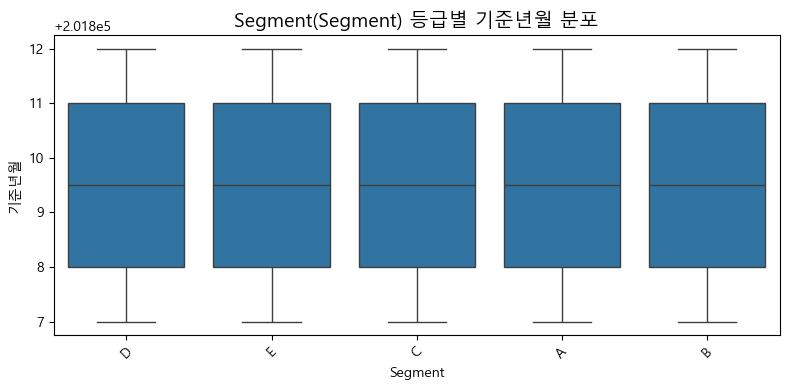

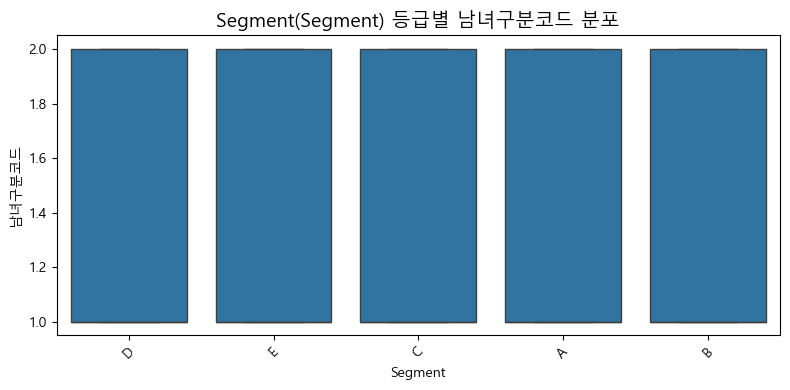

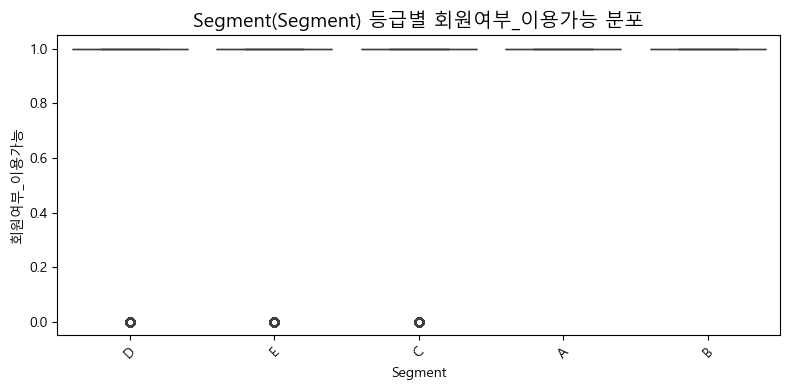

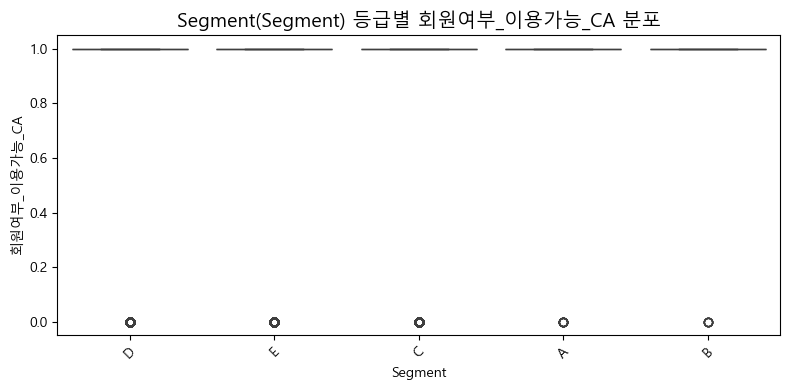

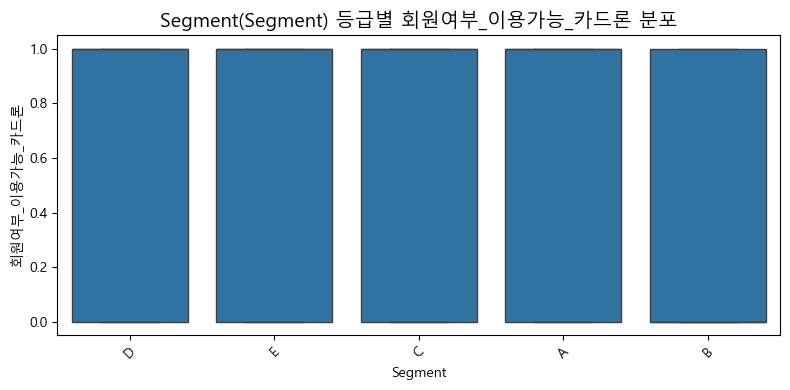

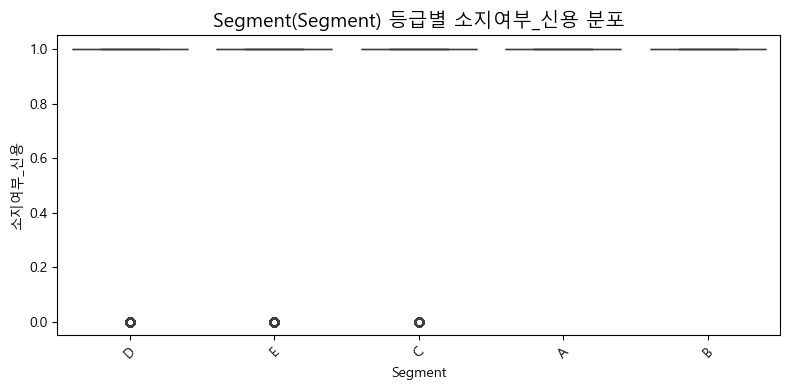

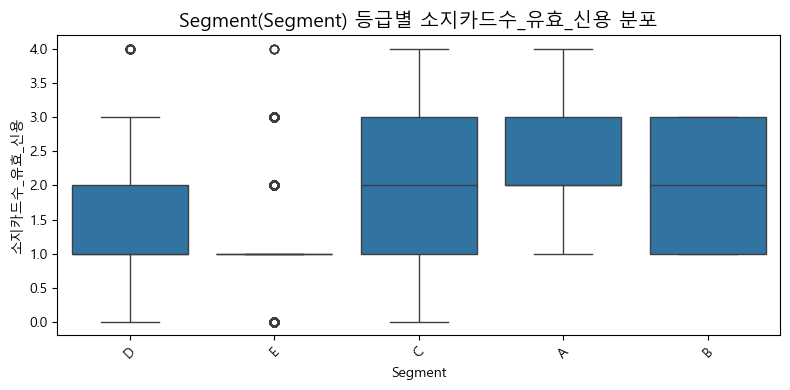

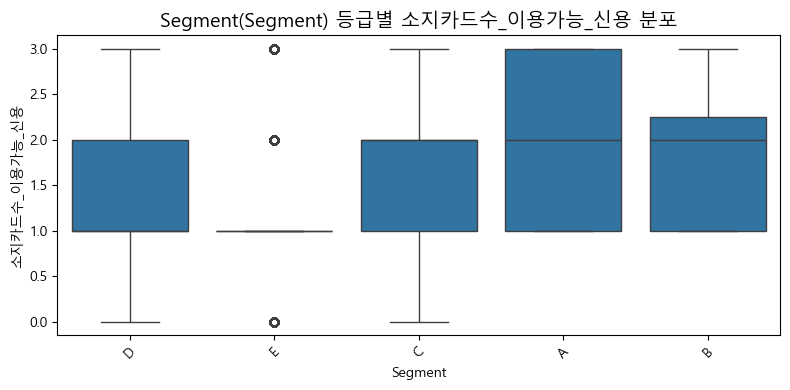

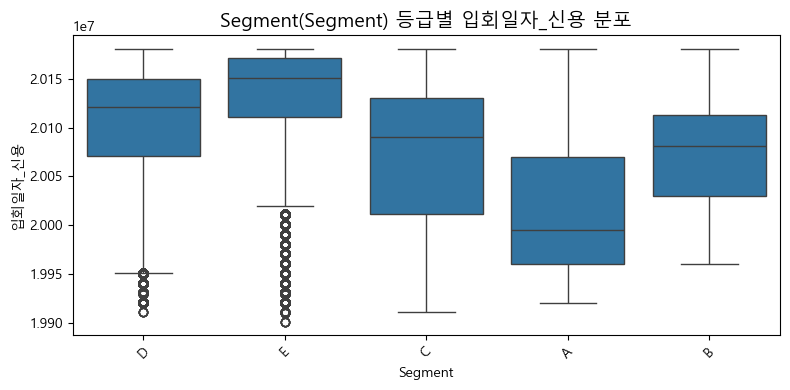

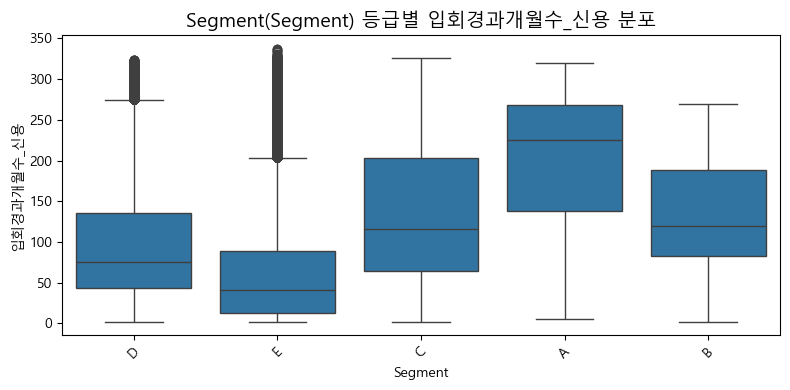

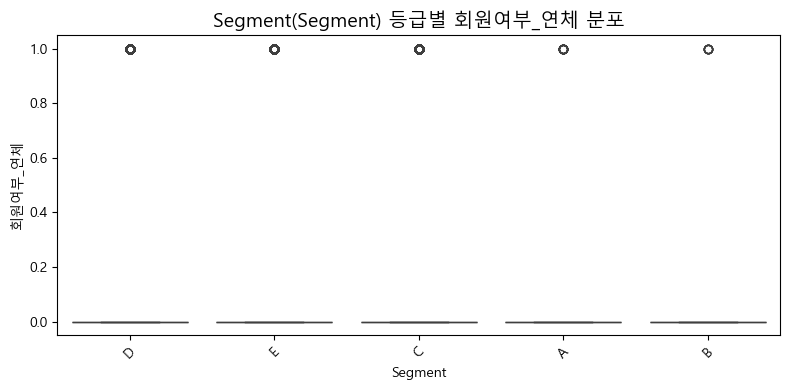

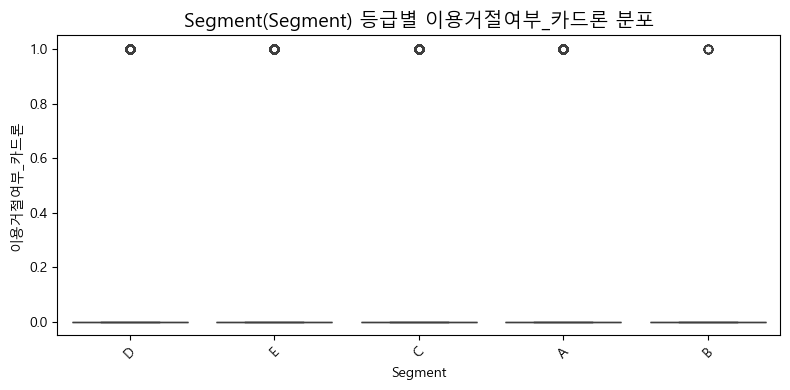

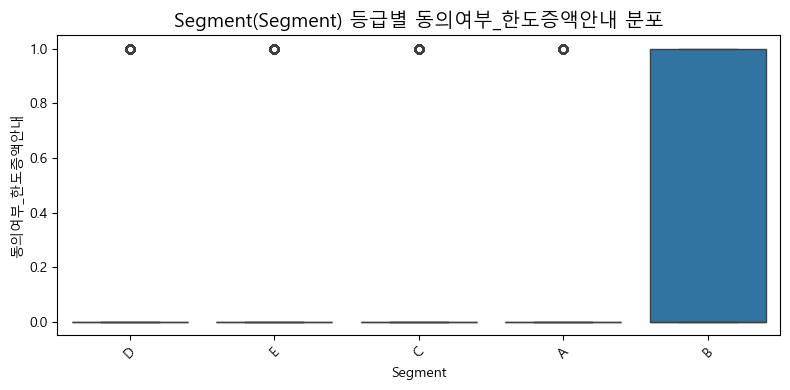

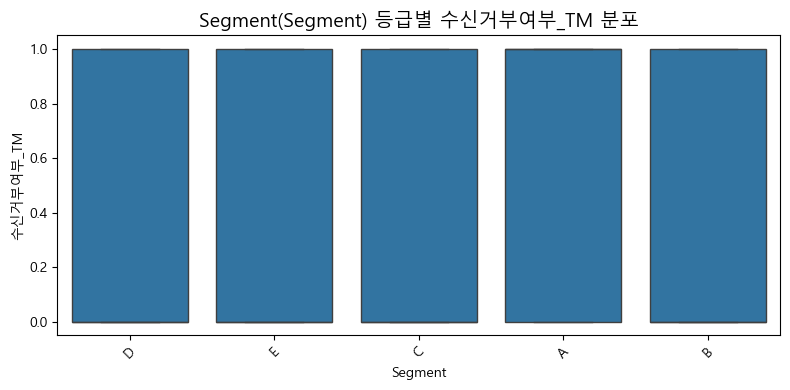

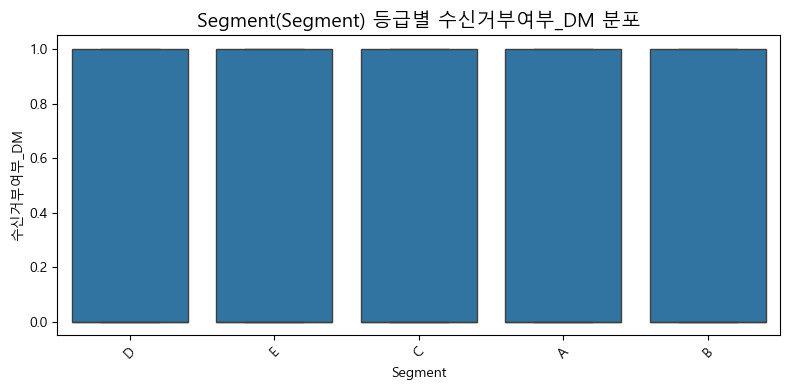

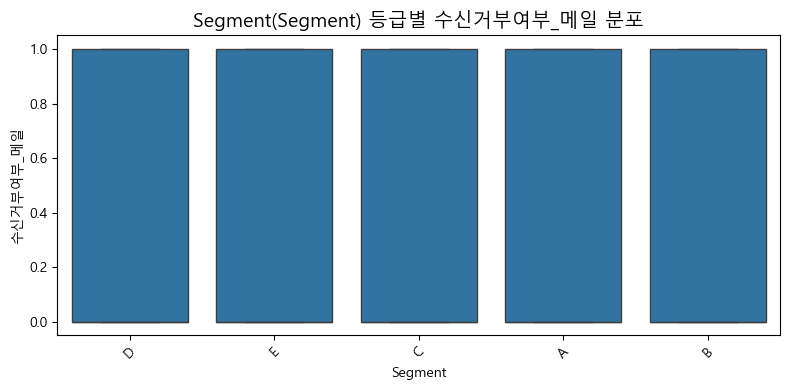

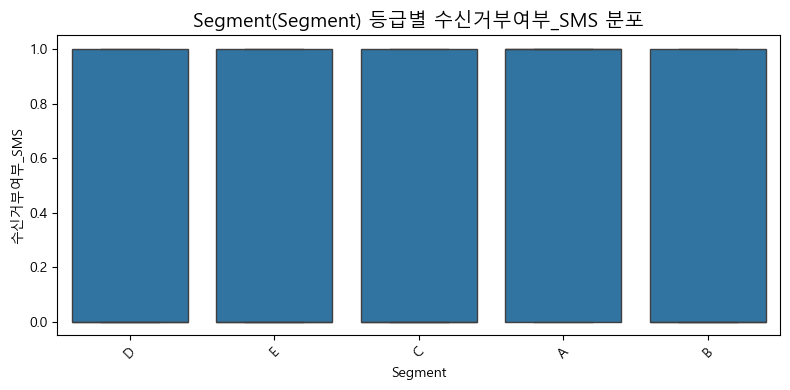

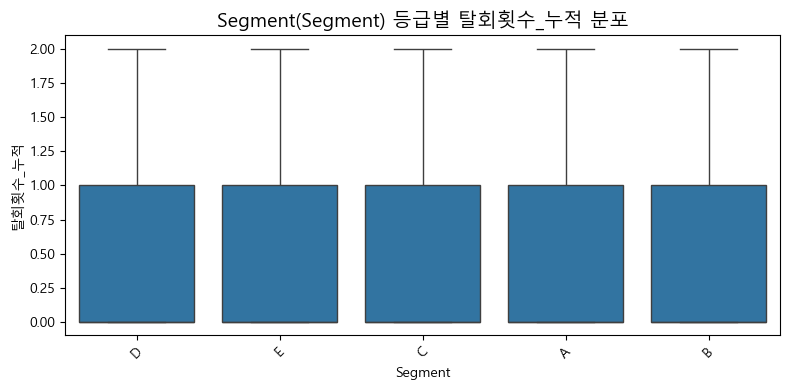

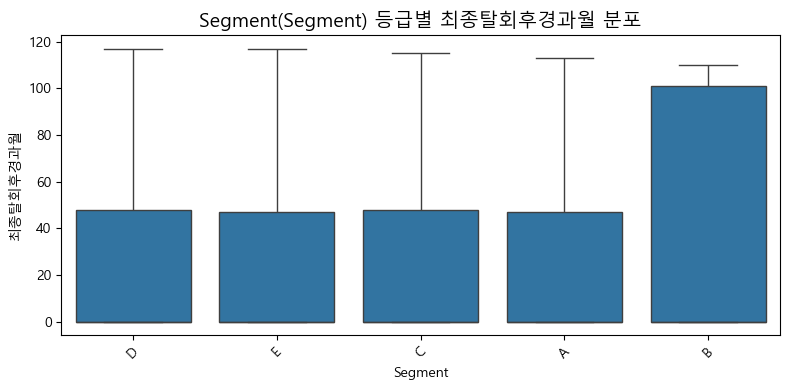

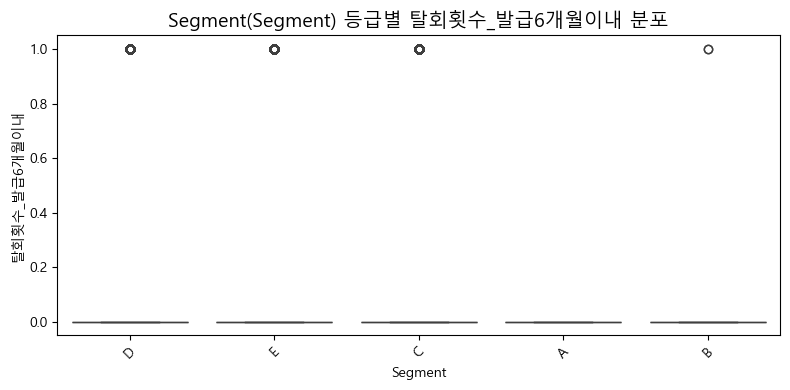

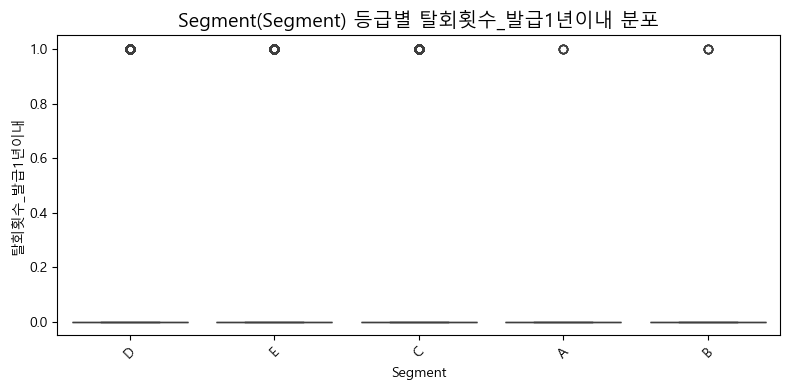

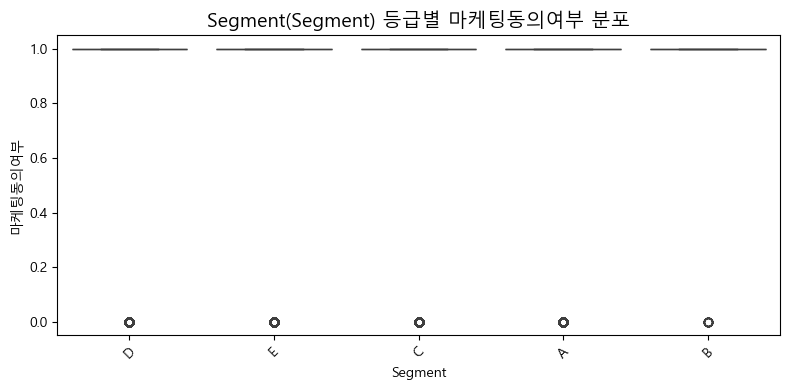

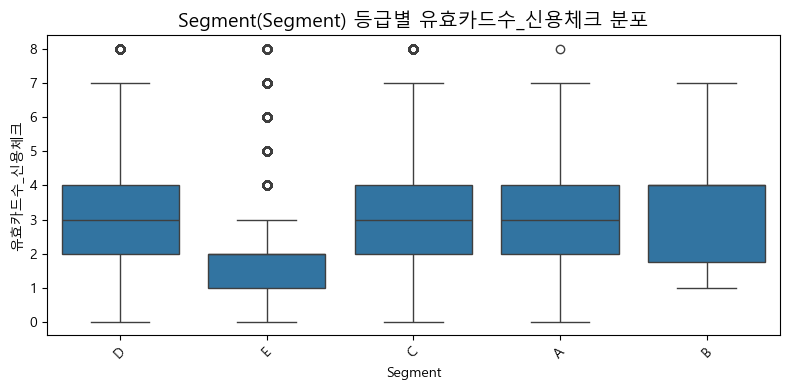

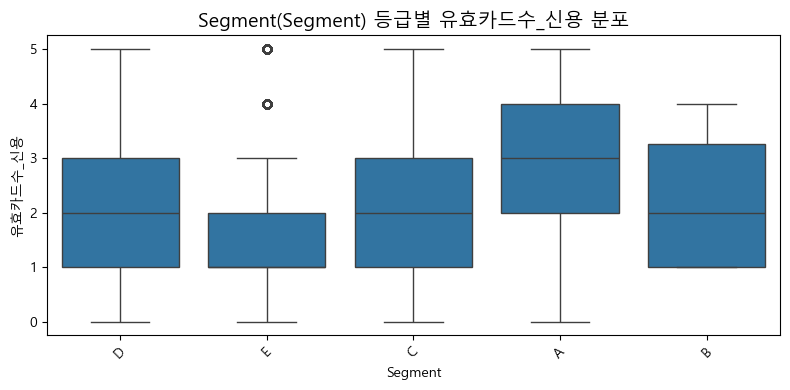

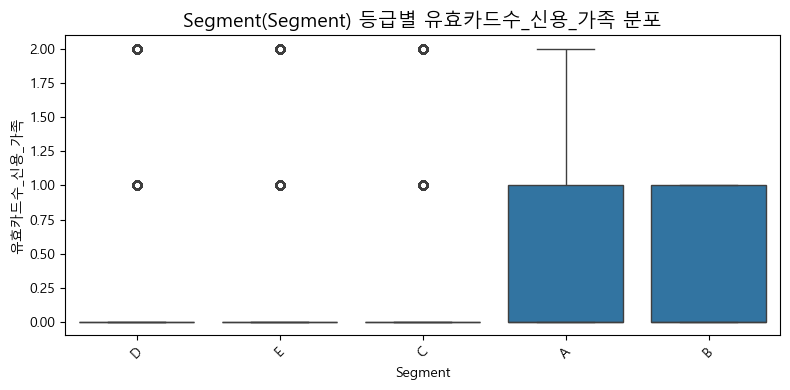

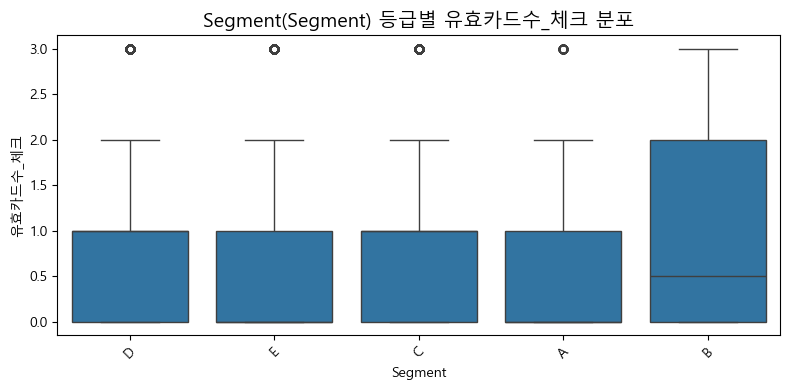

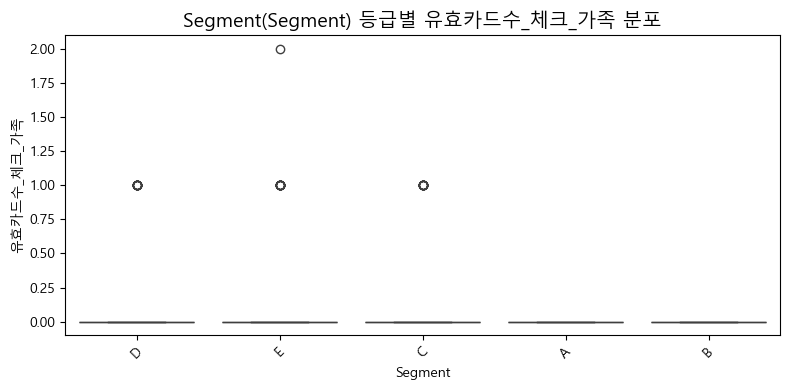

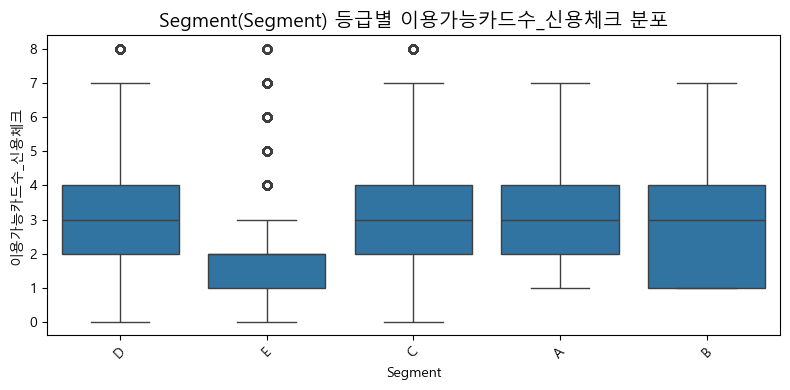

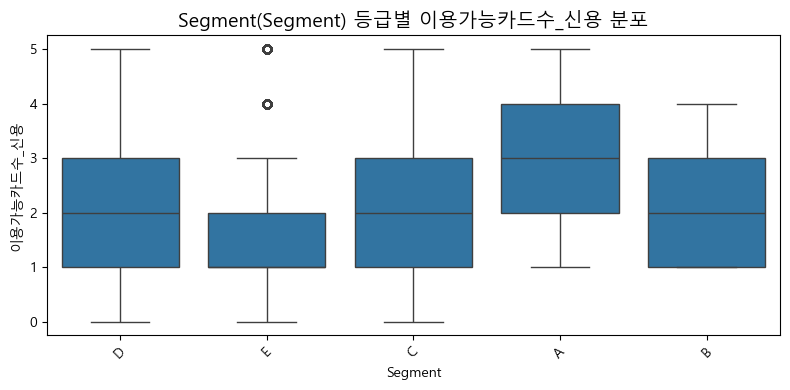

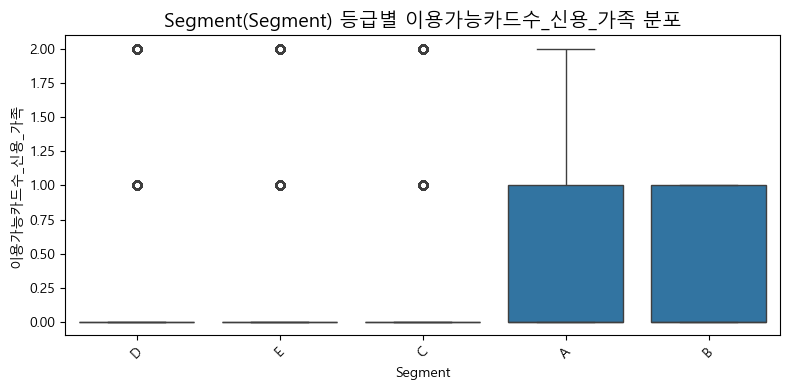

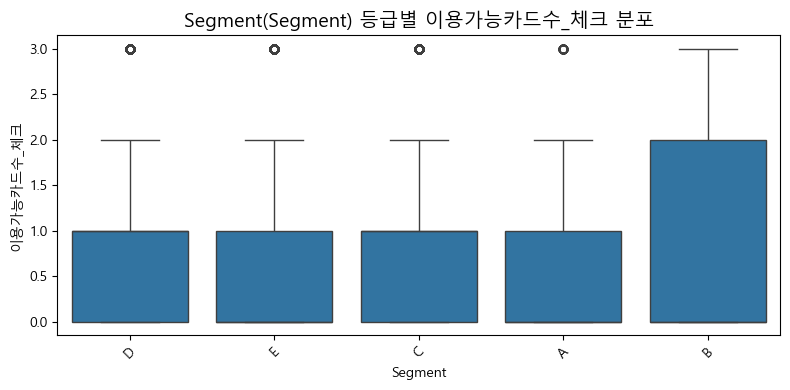

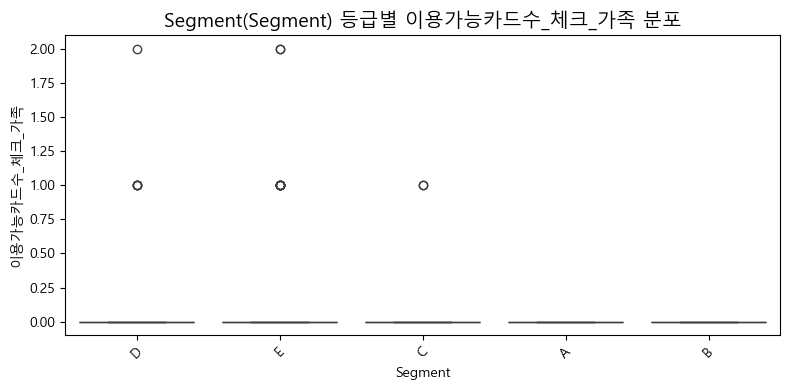

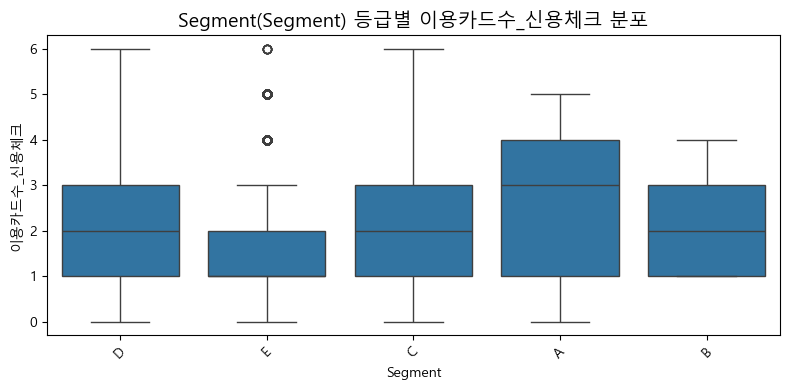

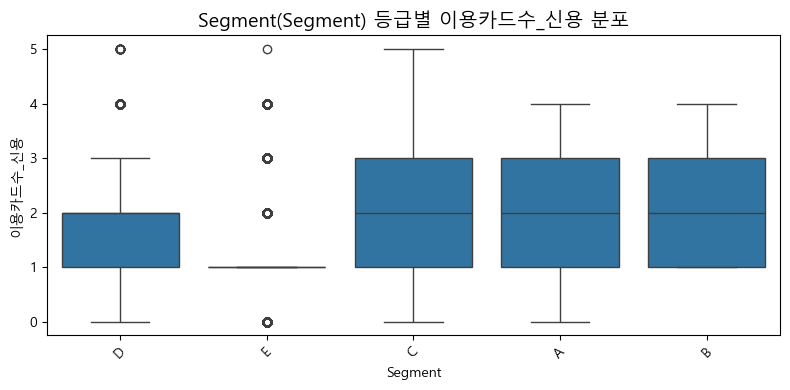

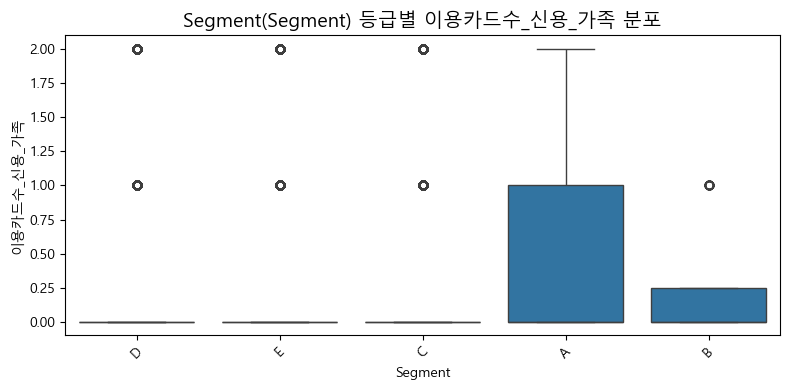

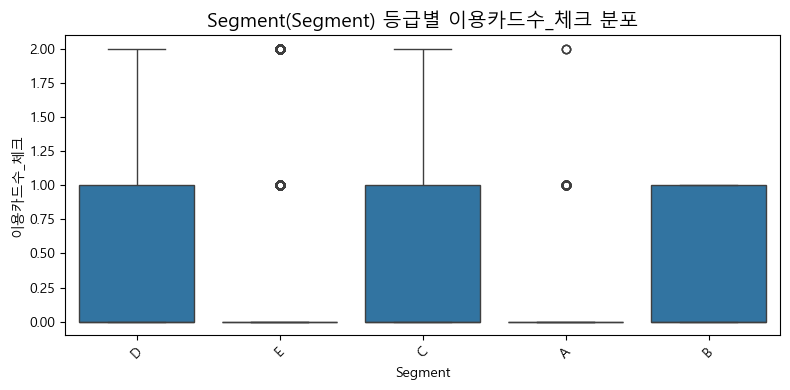

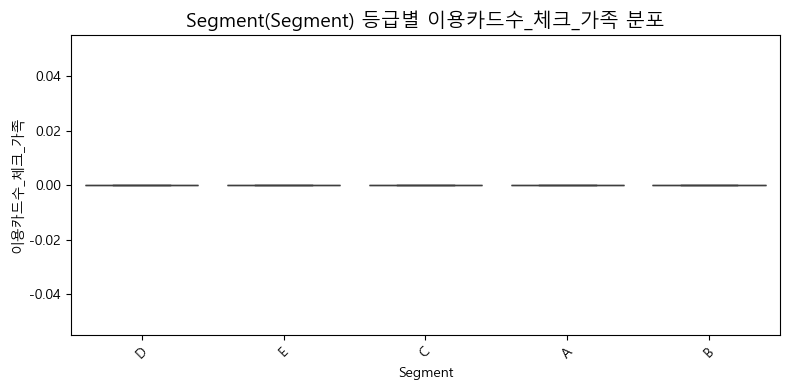

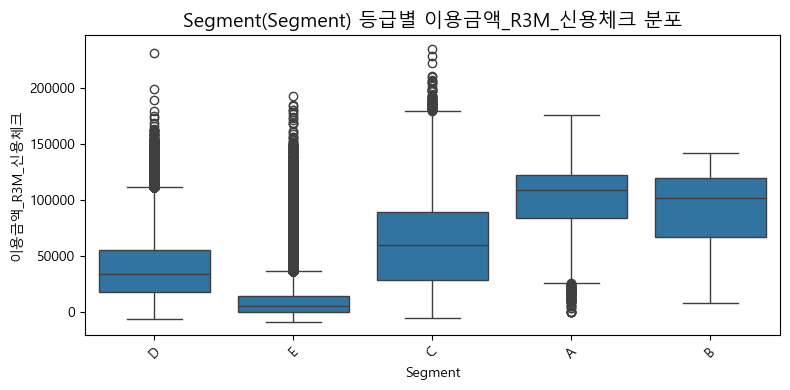

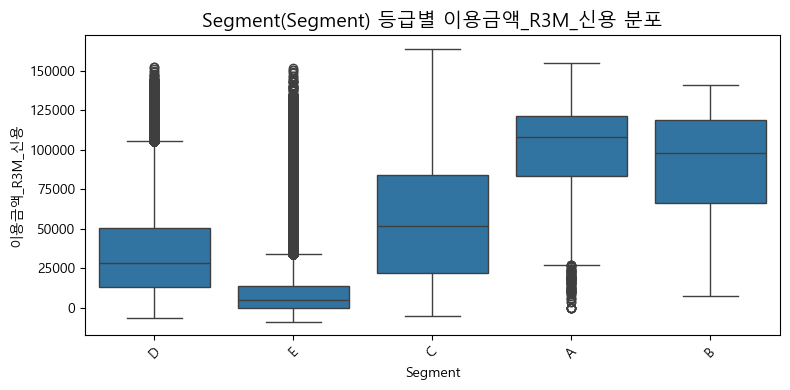

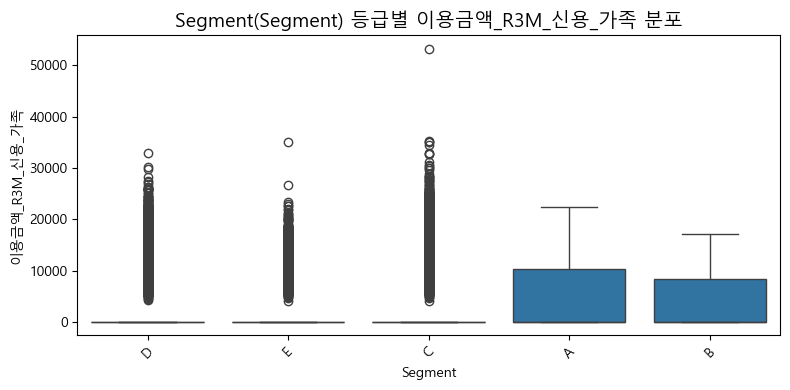

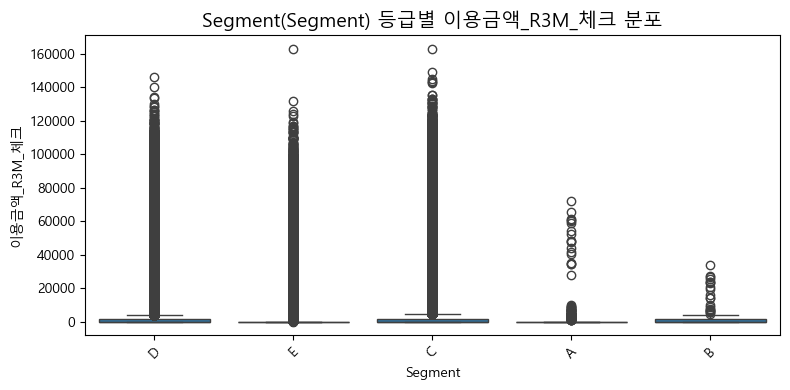

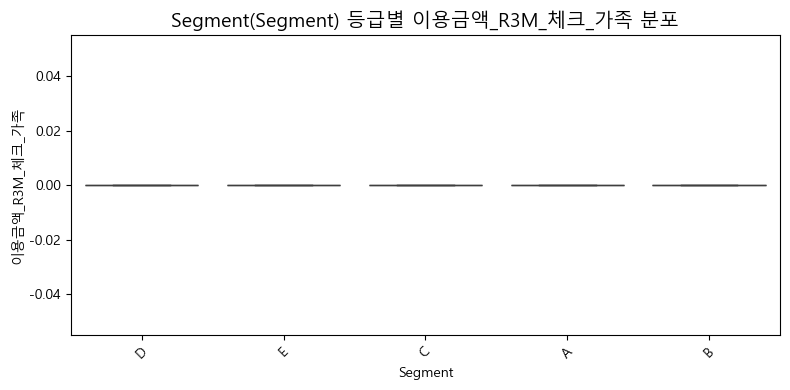

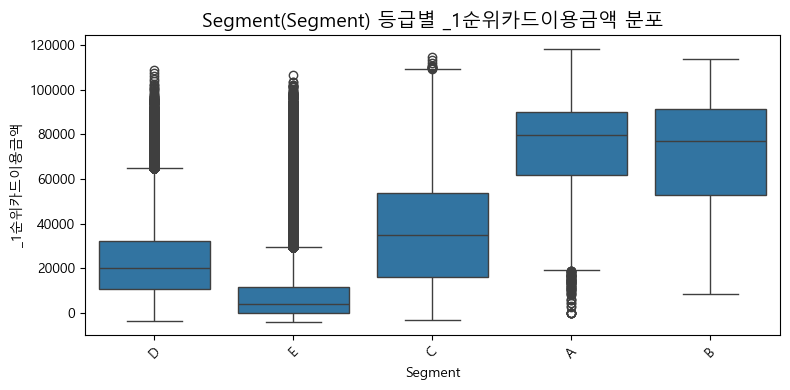

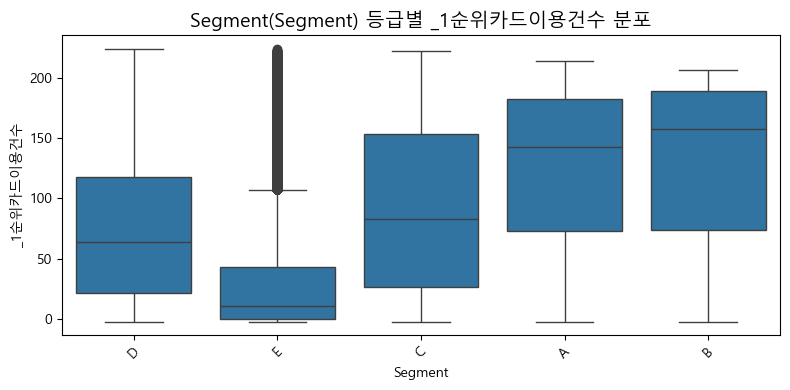

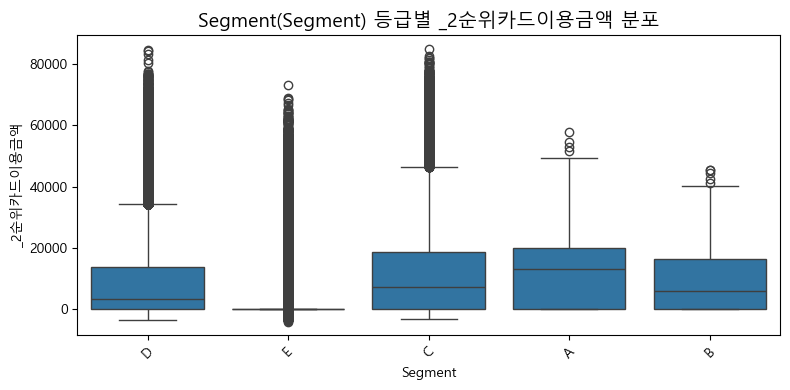

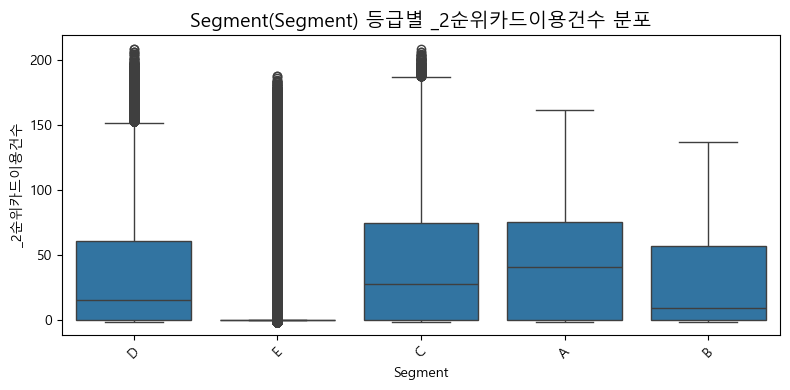

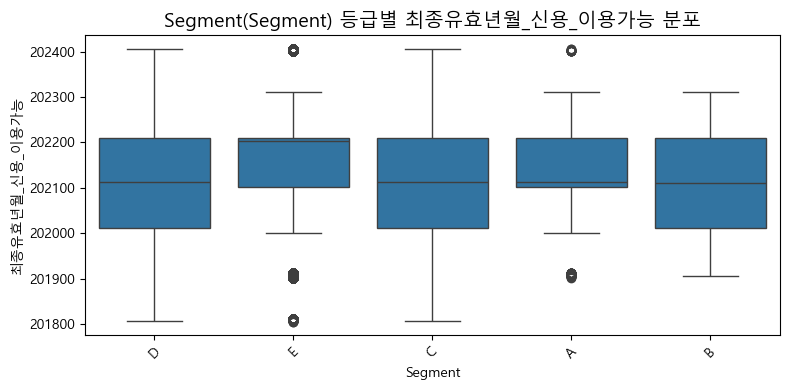

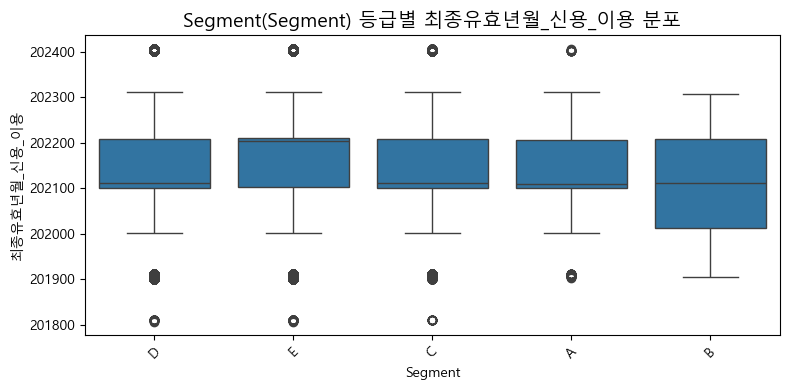

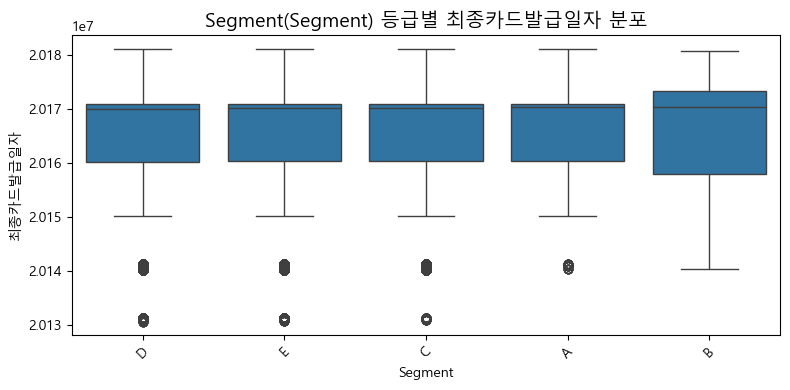

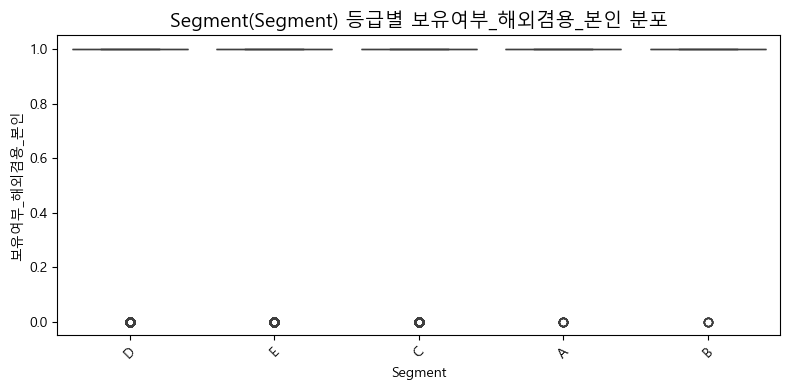

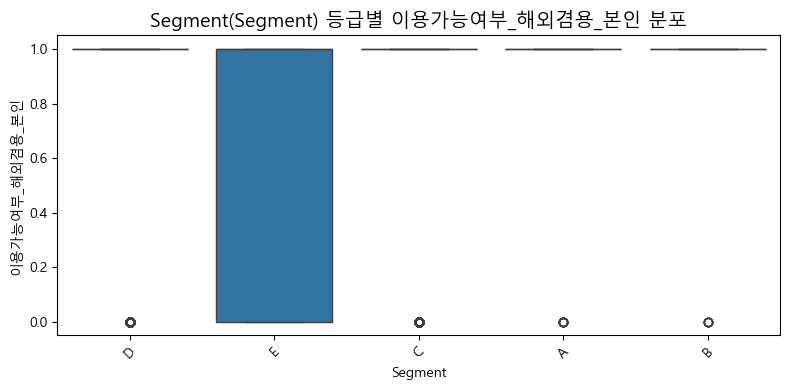

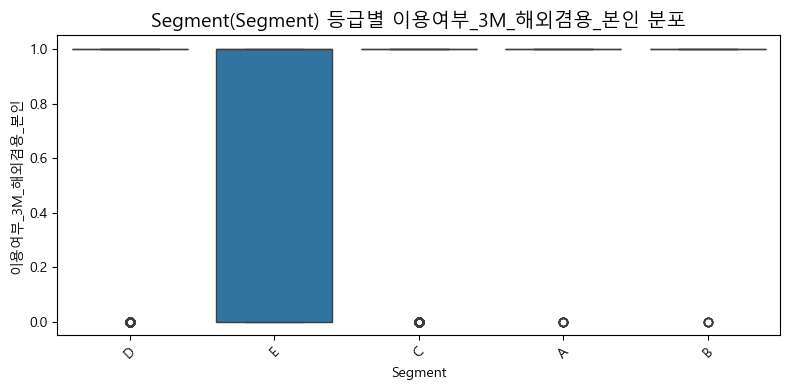

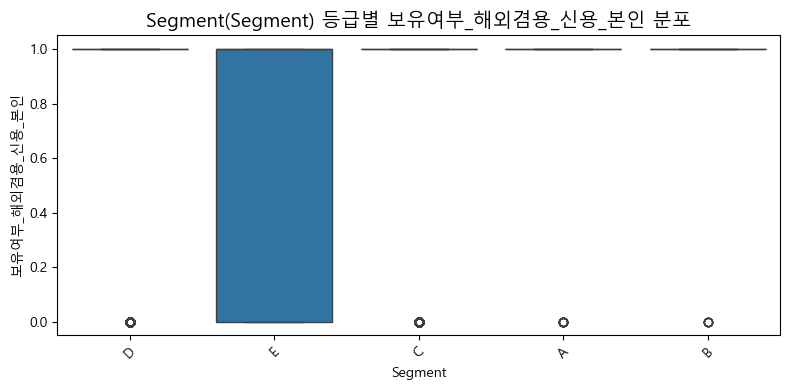

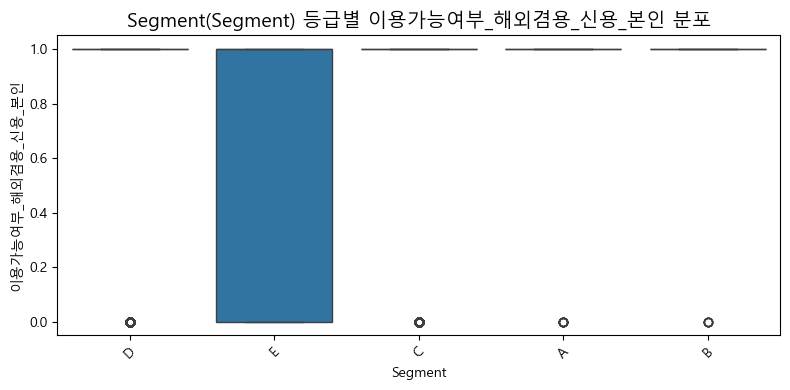

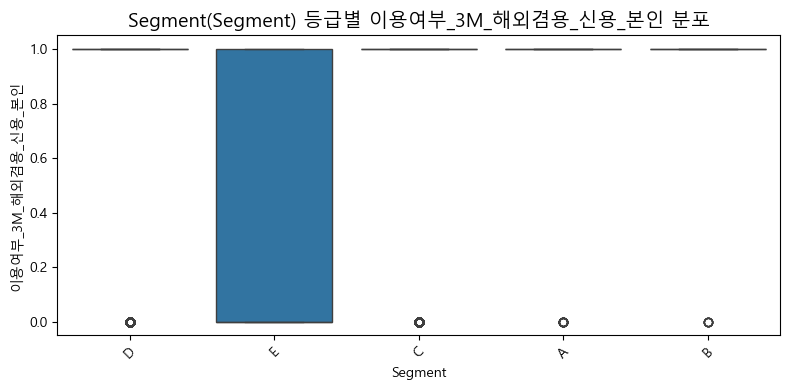

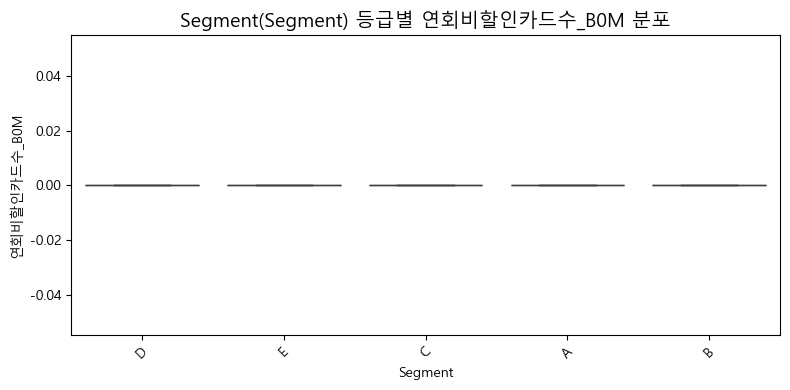

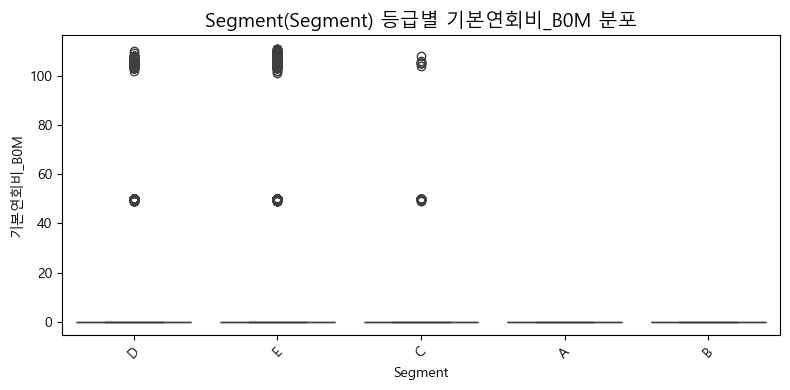

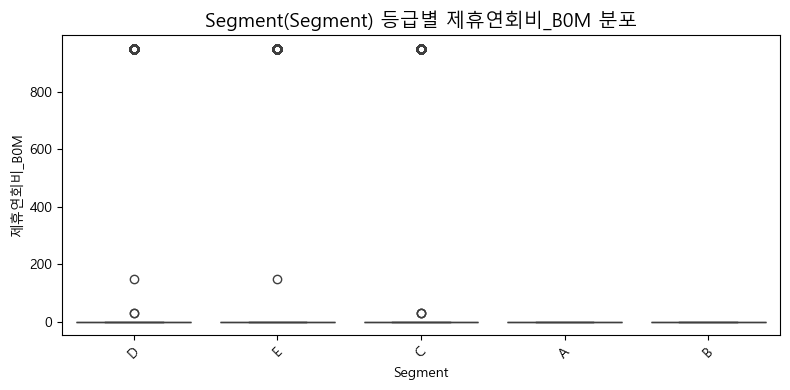

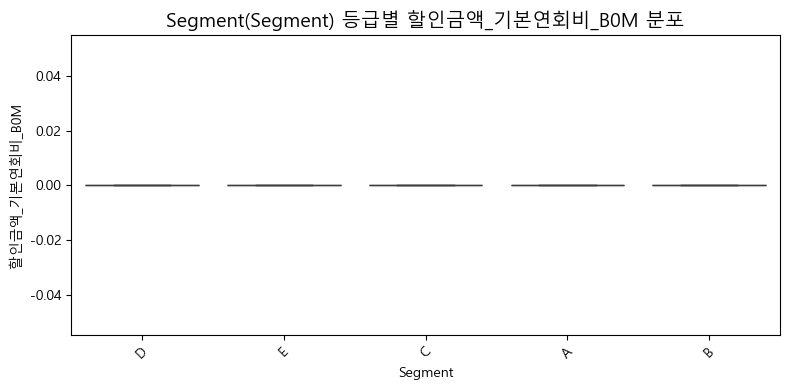

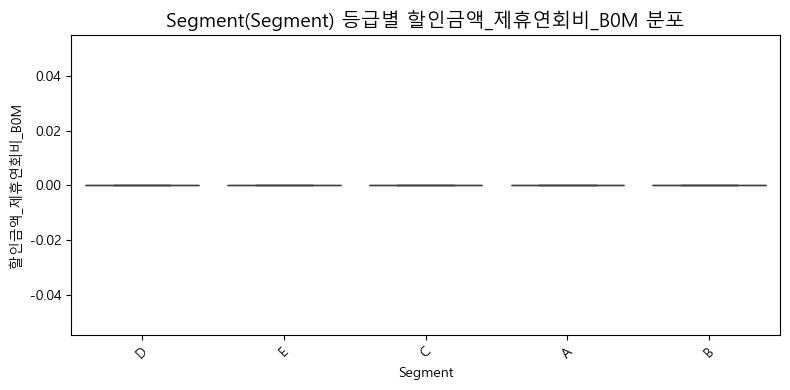

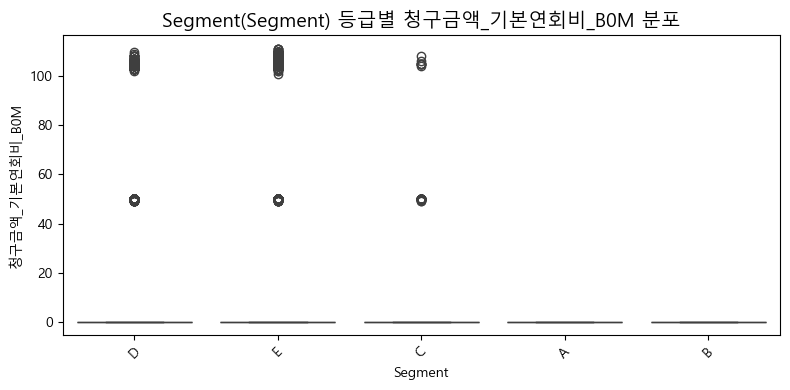

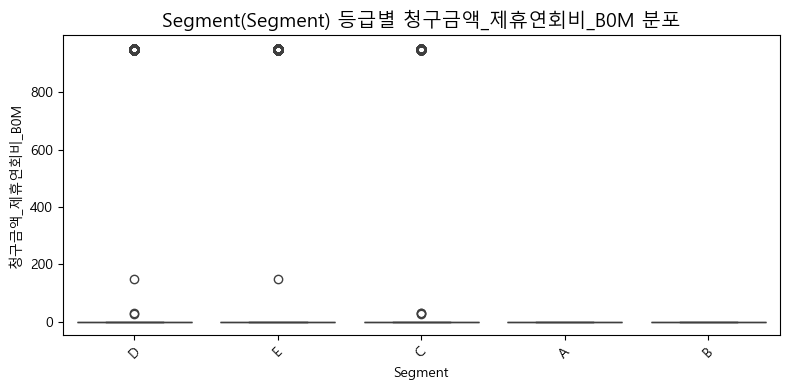

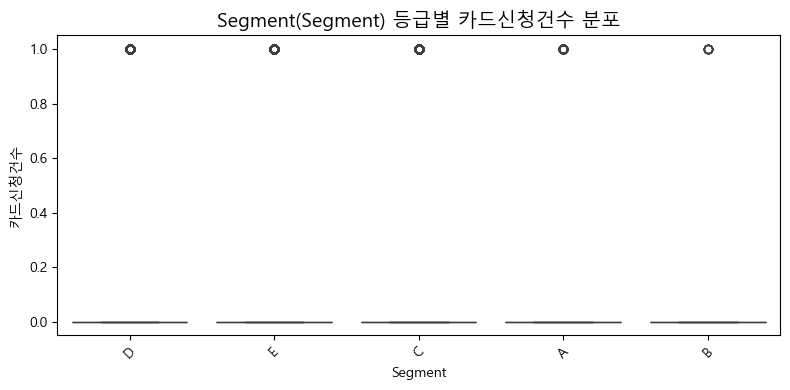

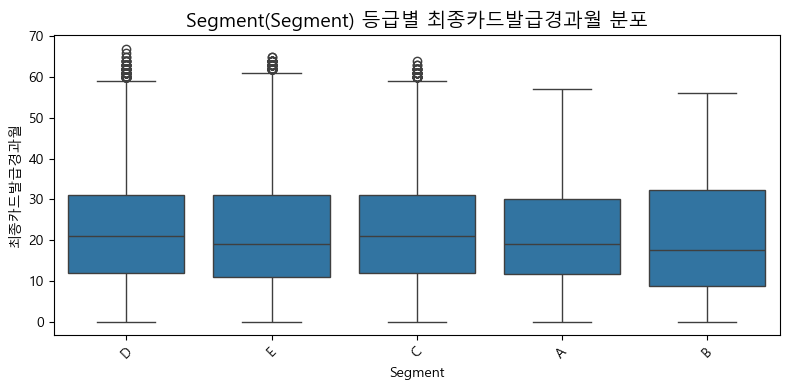

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import pandas as pd

# 예시: df 정의가 되어 있다고 가정
# df = pd.read_csv('파일경로.csv') 등으로 불러온 상태여야 함

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# Segment 컬럼명 지정
segment_col = 'Segment'

# 수치형 변수만 선택 (Segment 제외)
feature_cols = df.drop(columns=[segment_col]).select_dtypes(include=['int64', 'float64']).columns

# Boxplot 시각화
for col in feature_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=segment_col, y=col, data=df)
    plt.title(f'Segment({segment_col}) 등급별 {col} 분포', fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [31]:
#최종탈회후 경과월은 B 등급이 가장 높음


In [8]:
# Segment별로 평균 계산
group_summary = df.groupby(segment_col).mean(numeric_only=True)

# 한글 시각화 설정 유지
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각적으로 강조
from IPython.display import display

display(group_summary.style
        .background_gradient(cmap='YlGnBu')
        .set_caption("Segment별 평균값 요약")
        .format(precision=2))


,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,_2순위카드이용금액,이용카드수_신용체크,이용카드수_신용,_2순위카드이용건수,_1순위카드이용건수,이용가능카드수_신용체크,이용가능카드수_신용,유효카드수_신용체크,유효카드수_신용,소지카드수_유효_신용,소지카드수_이용가능_신용
Segment,,,,,,,,,,,,,,
0,98665.25,97428.47,72318.41,13105.56,2.55,2.46,44.37,125.82,3.12,2.70,3.16,2.73,2.15,2.10
1,90783.38,87995.18,69231.48,9346.46,2.34,1.98,32.02,129.91,3.05,2.12,3.14,2.14,1.85,1.79
2,63227.74,57332.42,37754.40,12620.59,2.50,2.20,45.59,94.58,3.27,2.41,3.31,2.44,1.85,1.79
3,40479.39,36343.47,23659.85,9410.92,2.16,1.89,37.77,79.47,2.82,2.05,2.86,2.08,1.57,1.52
4,13220.06,12332.33,9666.37,2532.57,1.47,1.34,11.75,39.20,1.93,1.43,1.95,1.45,1.21,1.19


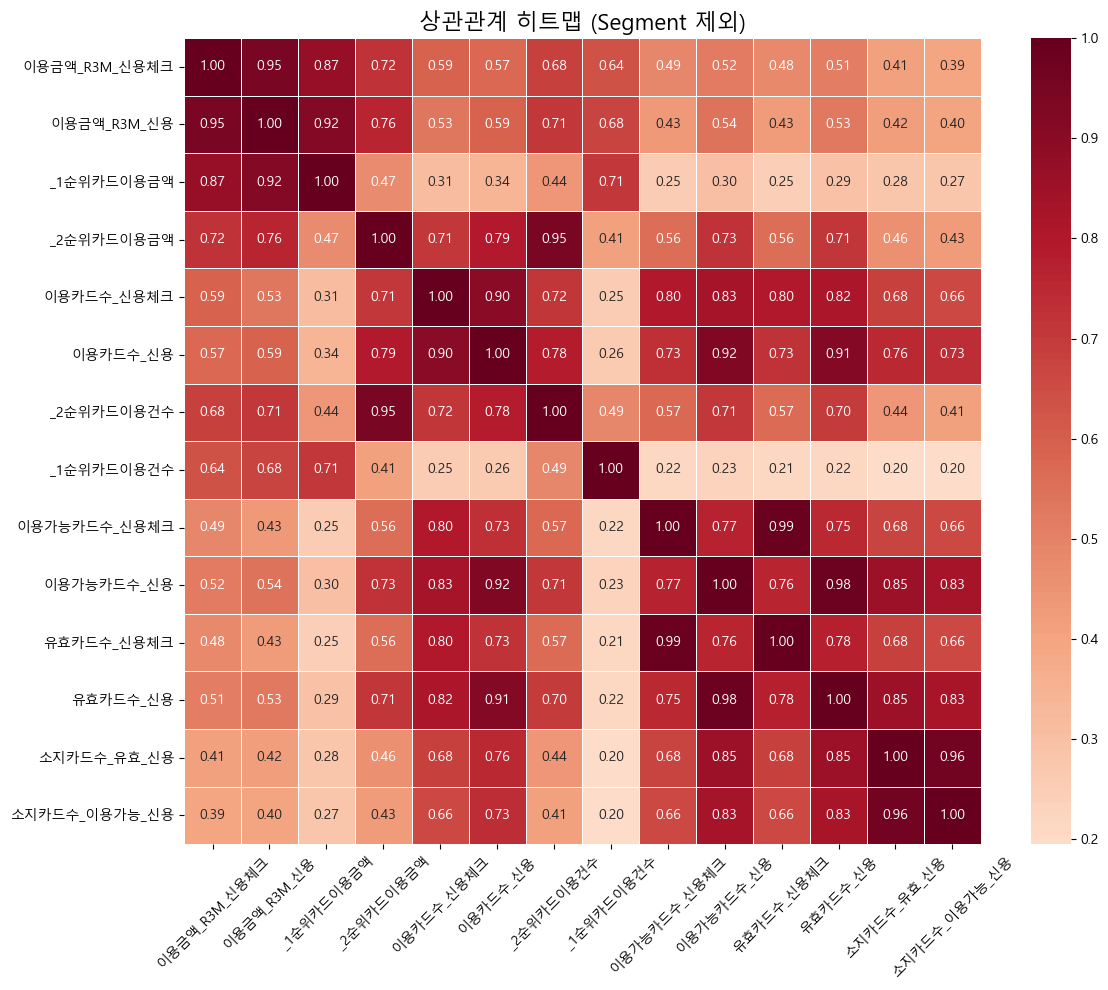

In [9]:
# Segment를 제외한 수치형 변수만 대상으로 상관계수 계산
corr_matrix = df.drop(columns=[segment_col]).corr()

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 히트맵 그리기
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True, fmt=".2f",
    cmap='RdBu_r',
    linewidths=0.5,
    center=0,
    cbar=True
)
plt.title("상관관계 히트맵 (Segment 제외)", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()



＃양의 상관관계: 두 변수 모두 증가하는 경향

＃음의 상관관계: 한 변수 증가 시, 다른 변수는 감소

＃상관계수가 0.8 이상이면 다중공선성 가능성도 있음 → 이후 모델링에서 VIF 체크 필요할 수도 있음

#변수별 분포확인

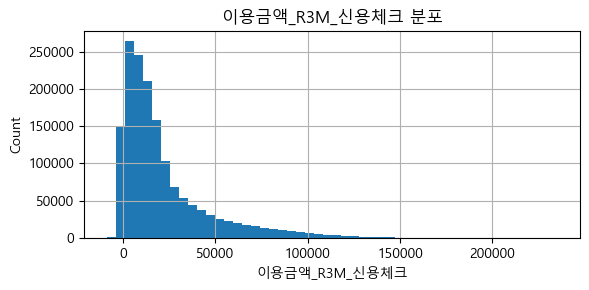

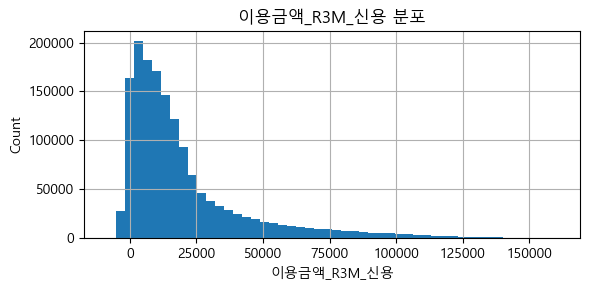

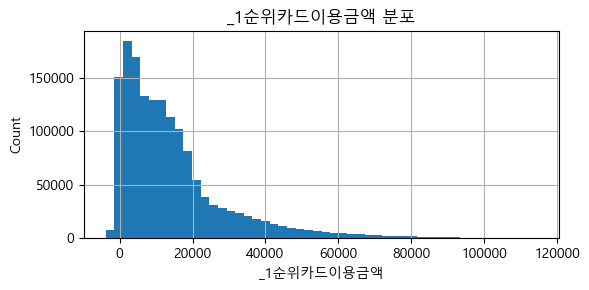

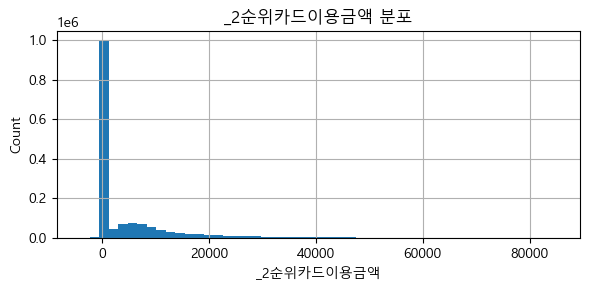

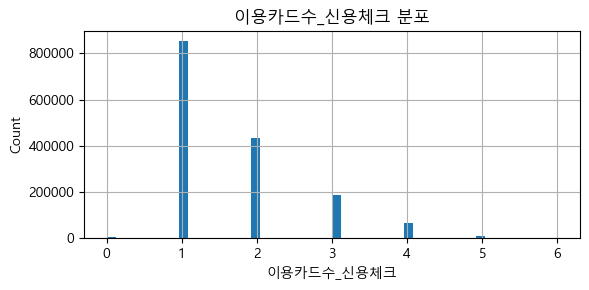

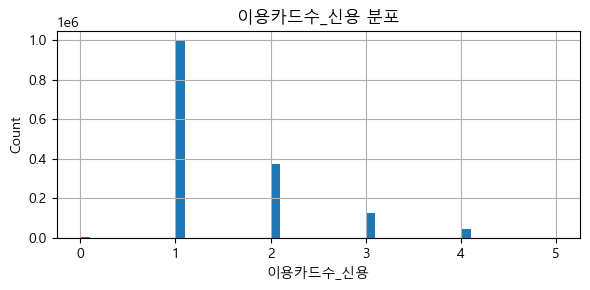

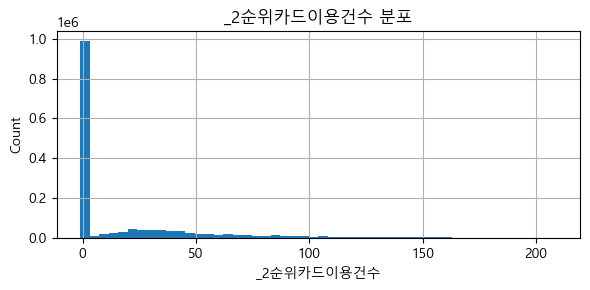

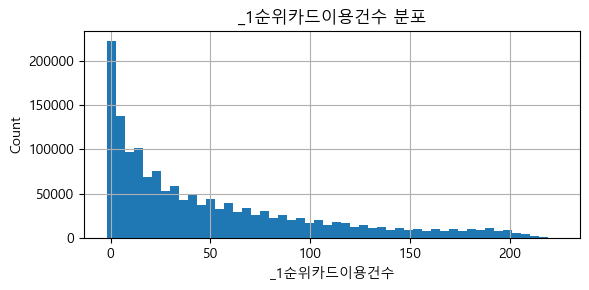

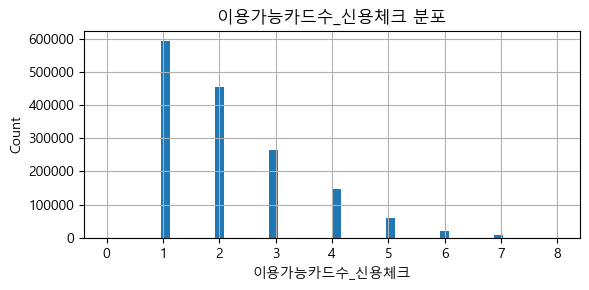

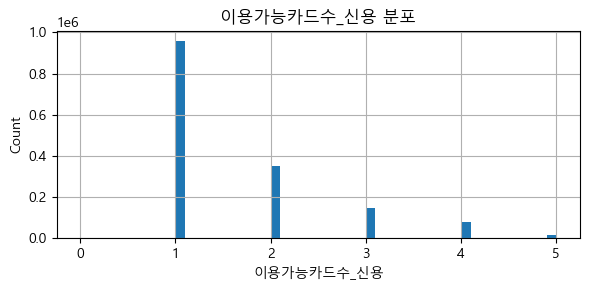

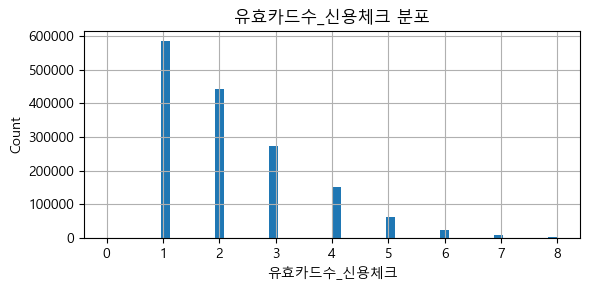

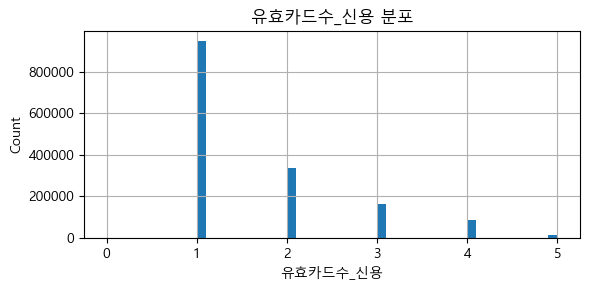

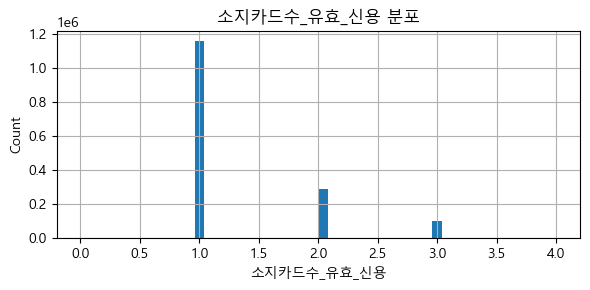

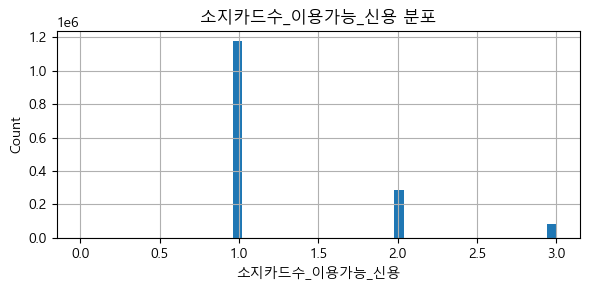

In [11]:
import matplotlib.pyplot as plt

for col in df.columns.drop('Segment'):
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=50)
    plt.title(f"{col} 분포")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


In [12]:
display(df.groupby('Segment').mean())
display(df.groupby('Segment').median())


,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,_2순위카드이용금액,이용카드수_신용체크,이용카드수_신용,_2순위카드이용건수,_1순위카드이용건수,이용가능카드수_신용체크,이용가능카드수_신용,유효카드수_신용체크,유효카드수_신용,소지카드수_유효_신용,소지카드수_이용가능_신용
Segment,,,,,,,,,,,,,,
0,98665.254975,97428.467662,72318.406716,13105.562189,2.546020,2.456468,44.370647,125.819652,3.120647,2.696517,3.161692,2.728856,2.154229,2.097015
1,90783.375000,87995.183333,69231.475000,9346.458333,2.341667,1.975000,32.025000,129.908333,3.050000,2.125000,3.141667,2.141667,1.850000,1.791667
2,63227.742930,57332.419027,37754.401123,12620.585558,2.501990,2.198863,45.592114,94.577032,3.267310,2.407886,3.306603,2.441268,1.850848,1.794383
3,40479.393375,36343.465848,23659.850112,9410.917565,2.162978,1.891390,37.772425,79.472531,2.816687,2.045716,2.855558,2.079984,1.566311,1.523642
4,13220.061909,12332.329958,9666.368848,2532.568589,1.473852,1.338636,11.748357,39.200130,1.925076,1.426114,1.952907,1.450967,1.212066,1.193524


,이용금액_R3M_신용체크,이용금액_R3M_신용,_1순위카드이용금액,_2순위카드이용금액,이용카드수_신용체크,이용카드수_신용,_2순위카드이용건수,_1순위카드이용건수,이용가능카드수_신용체크,이용가능카드수_신용,유효카드수_신용체크,유효카드수_신용,소지카드수_유효_신용,소지카드수_이용가능_신용
Segment,,,,,,,,,,,,,,
0,108875.5,107748.0,78971.0,13607.5,3.0,3.0,42.0,143.0,3.0,3.0,3.0,3.0,2.0,2.0
1,101807.0,97174.5,76395.5,6697.5,2.0,2.0,11.5,154.0,3.0,2.0,4.0,2.0,2.0,2.0
2,62391.5,54599.5,36420.0,8328.0,2.0,2.0,32.0,89.0,3.0,2.0,3.0,2.0,2.0,2.0
3,35192.0,30202.0,21218.0,4592.0,2.0,2.0,22.0,70.0,3.0,2.0,3.0,2.0,1.0,1.0
4,9902.0,9206.0,7753.0,0.0,1.0,1.0,0.0,23.0,2.0,1.0,2.0,1.0,1.0,1.0


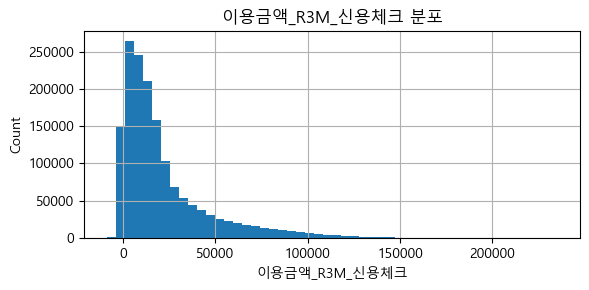

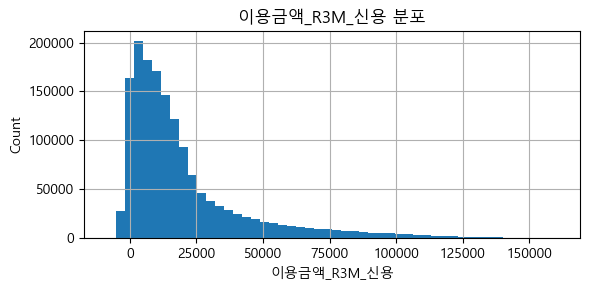

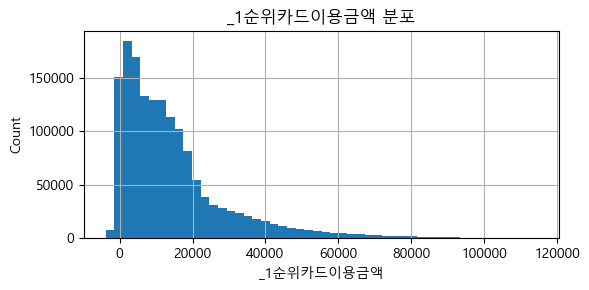

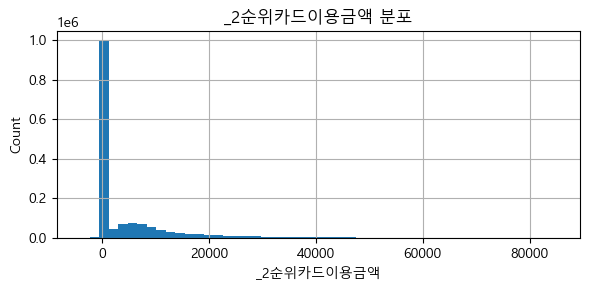

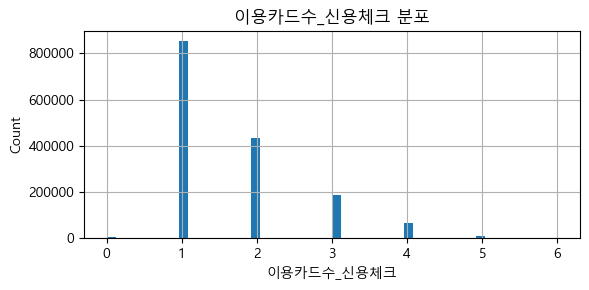

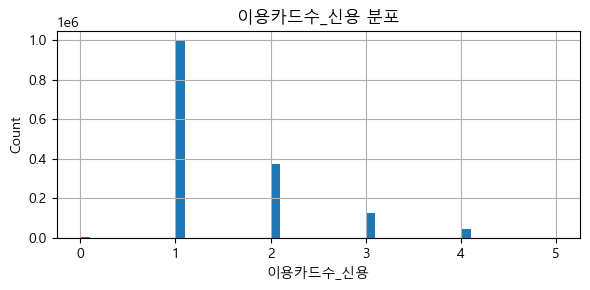

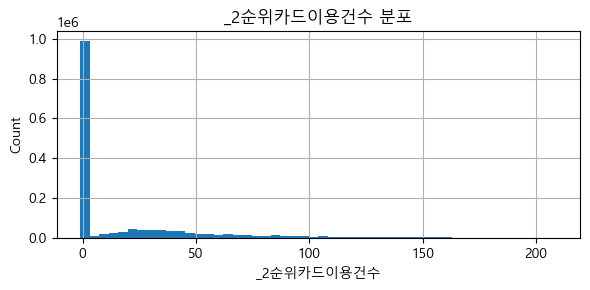

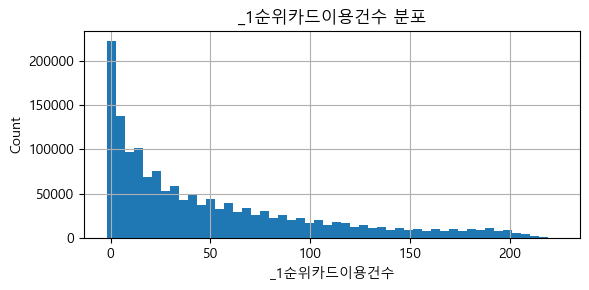

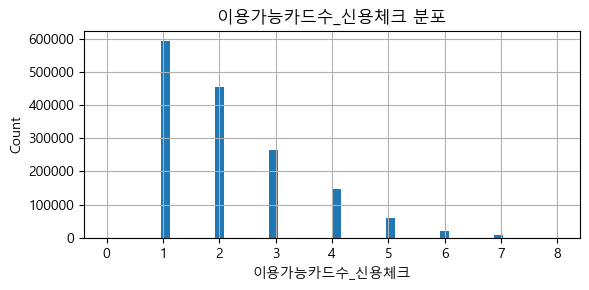

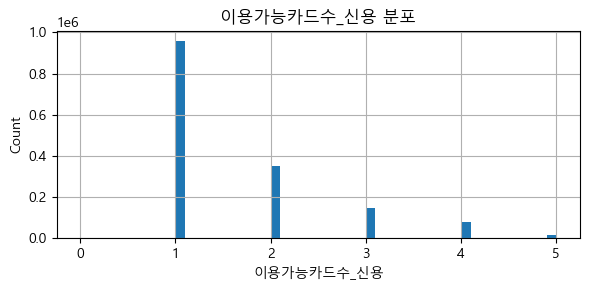

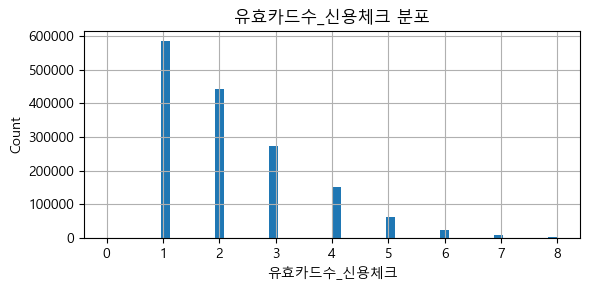

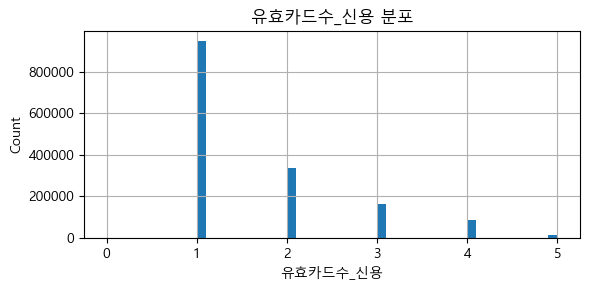

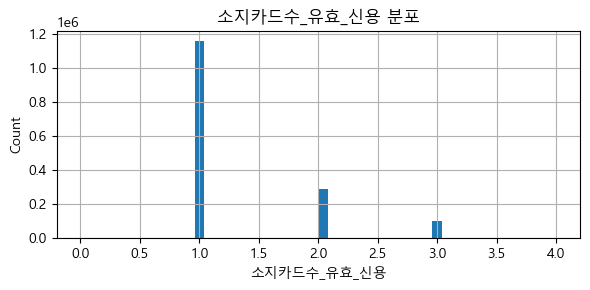

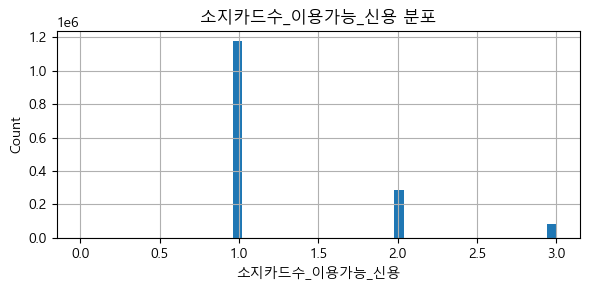

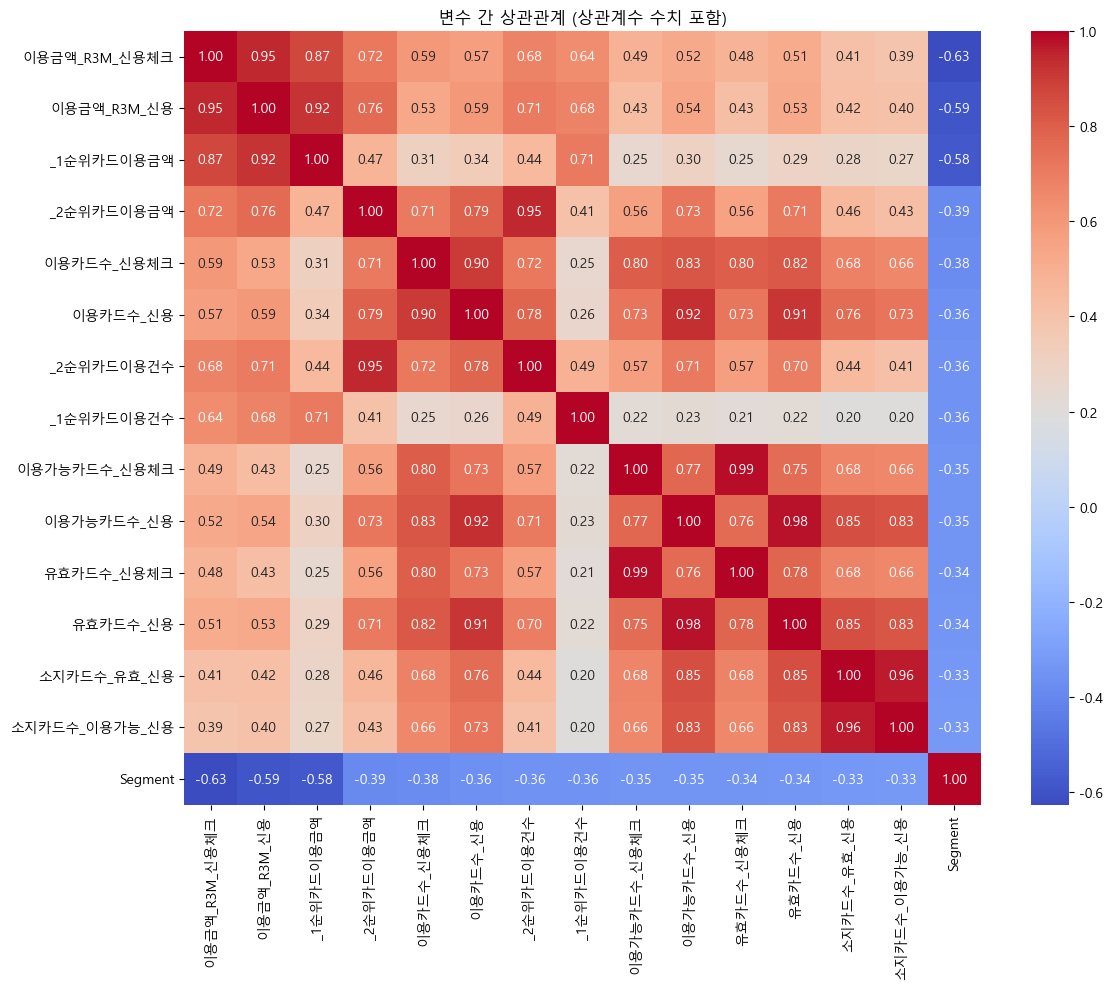

📌 강한 상관관계를 가진 변수쌍 (|상관계수| ≥ 0.7):


,변수1,변수2,상관계수,절댓값
85,이용가능카드수_신용체크,유효카드수_신용체크,0.985028,0.985028
91,이용가능카드수_신용,유효카드수_신용,0.975956,0.975956
102,소지카드수_유효_신용,소지카드수_이용가능_신용,0.962028,0.962028
41,_2순위카드이용금액,_2순위카드이용건수,0.947555,0.947555
0,이용금액_R3M_신용체크,이용금액_R3M_신용,0.945666,0.945666
63,이용카드수_신용,이용가능카드수_신용,0.923949,0.923949
14,이용금액_R3M_신용,_1순위카드이용금액,0.921131,0.921131
65,이용카드수_신용,유효카드수_신용,0.913309,0.913309
50,이용카드수_신용체크,이용카드수_신용,0.899784,0.899784
1,이용금액_R3M_신용체크,_1순위카드이용금액,0.870246,0.870246


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. 히스토그램 (Segment 제외)
for col in df.columns.drop('Segment'):
    plt.figure(figsize=(6, 3))
    df[col].hist(bins=50)
    plt.title(f"{col} 분포")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

# 2. 상관계수 히트맵 (수치 포함)
plt.figure(figsize=(12, 10))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("변수 간 상관관계 (상관계수 수치 포함)")
plt.tight_layout()
plt.show()

# 3. 강한 상관관계 변수쌍 추출 (절댓값 기준 0.7 이상, 자기자신 제외)
strong_corrs = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))  # 위삼각행렬만
    .stack()  # 길게 펴기
    .reset_index()
)

strong_corrs.columns = ['변수1', '변수2', '상관계수']
strong_corrs['절댓값'] = strong_corrs['상관계수'].abs()
strong_corrs = strong_corrs[strong_corrs['절댓값'] >= 0.7].sort_values(by='절댓값', ascending=False)

print("📌 강한 상관관계를 가진 변수쌍 (|상관계수| ≥ 0.7):")
display(strong_corrs)


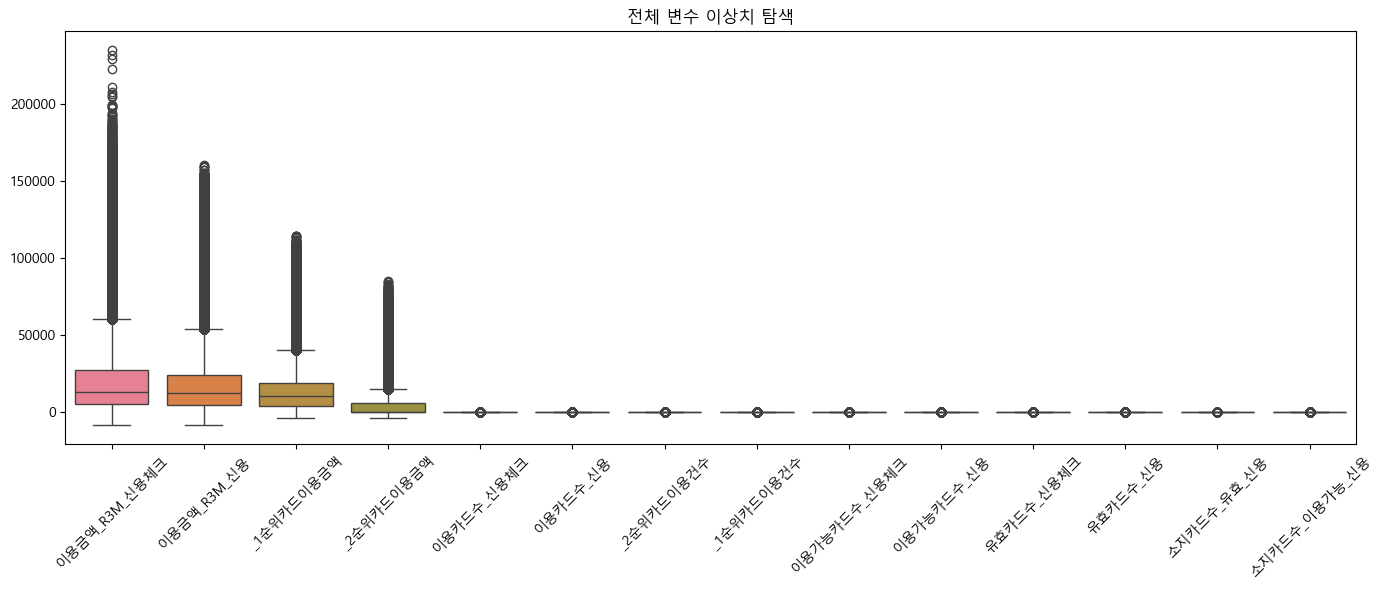

In [15]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df.drop(columns='Segment'))
plt.xticks(rotation=45)
plt.title("전체 변수 이상치 탐색")
plt.tight_layout()
plt.show()


In [23]:
import os
import pandas as pd

# 1. 폴더 경로 설정
base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보"  # 네 파일 경로에 맞게 수정

# 2. 파일명 리스트 (201807 ~ 201812)
months = ['07', '08', '09', '10', '11', '12']
file_paths = [os.path.join(base_path, f"2018{month}_train_회원정보.parquet") for month in months]

# 3. 병합 + 기준년월 추가
df_list = []

for path in file_paths:
    df_temp = pd.read_parquet(path)
    기준년월 = os.path.basename(path).split('_')[0]  # 예: '201807'
    df_temp['기준년월'] = int(기준년월)
    df_list.append(df_temp)

# 4. 병합
df = pd.concat(df_list, ignore_index=True)


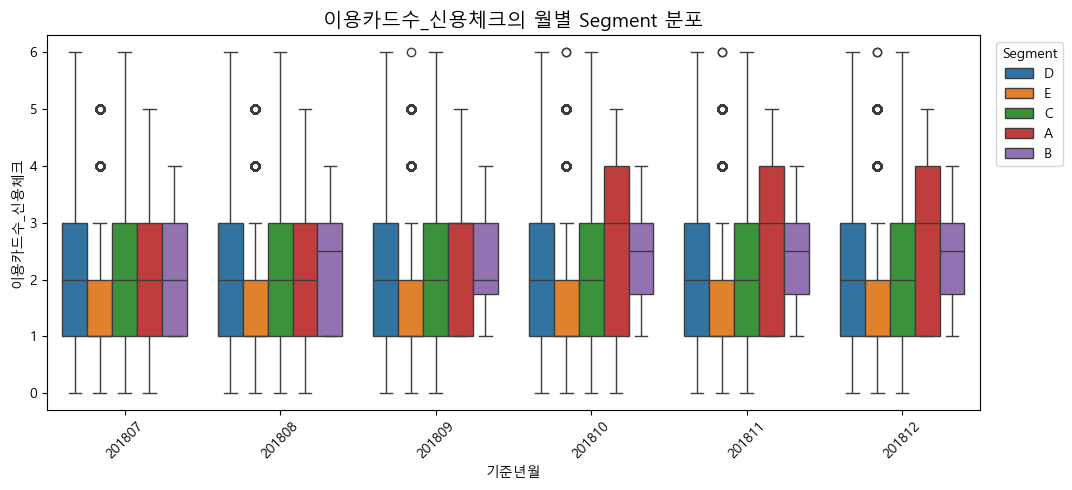

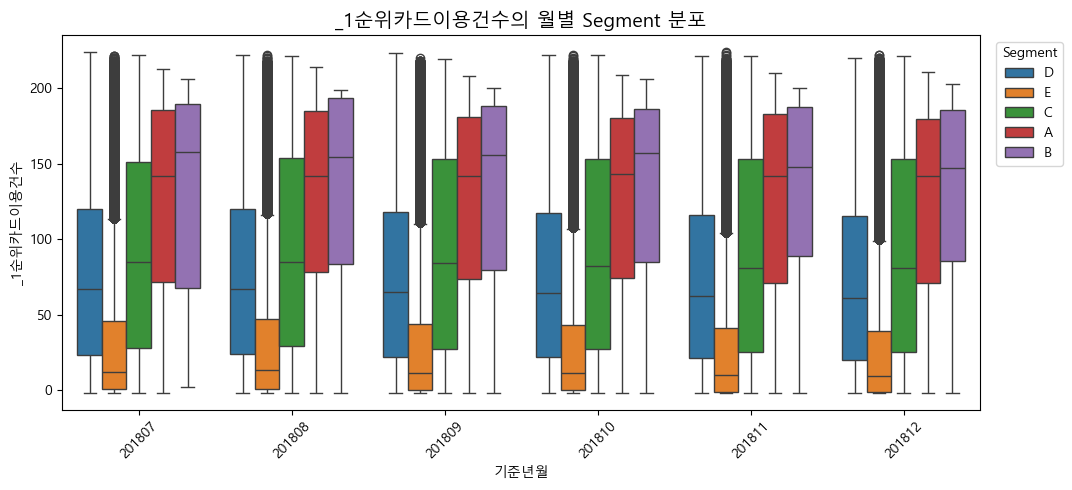

In [24]:
# 기준년월이 정수형이므로 정렬
month_order = sorted(df['기준년월'].unique())

# VIF 기준 대표 변수
vif_cols = ['이용카드수_신용체크', '_1순위카드이용건수']

# Boxplot 시각화
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

for col in vif_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='기준년월', y=col, hue='Segment', data=df, order=month_order)
    plt.title(f"{col}의 월별 Segment 분포", fontsize=14)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title="Segment", bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.show()


In [26]:
import os
import pandas as pd

# 병합할 파일 경로 리스트
base_path = "C:/Users/HR/Desktop/workspace/파이널프로젝트/open/train/1.회원정보"
months = ['07', '08', '09', '10', '11', '12']
file_paths = [os.path.join(base_path, f"2018{month}_train_회원정보.parquet") for month in months]

# 병합 + 기준년월 추가
df_list = []
for path in file_paths:
    df_temp = pd.read_parquet(path)
    기준년월 = os.path.basename(path).split('_')[0]
    df_temp['기준년월'] = int(기준년월)
    df_list.append(df_temp)

df = pd.concat(df_list, ignore_index=True)


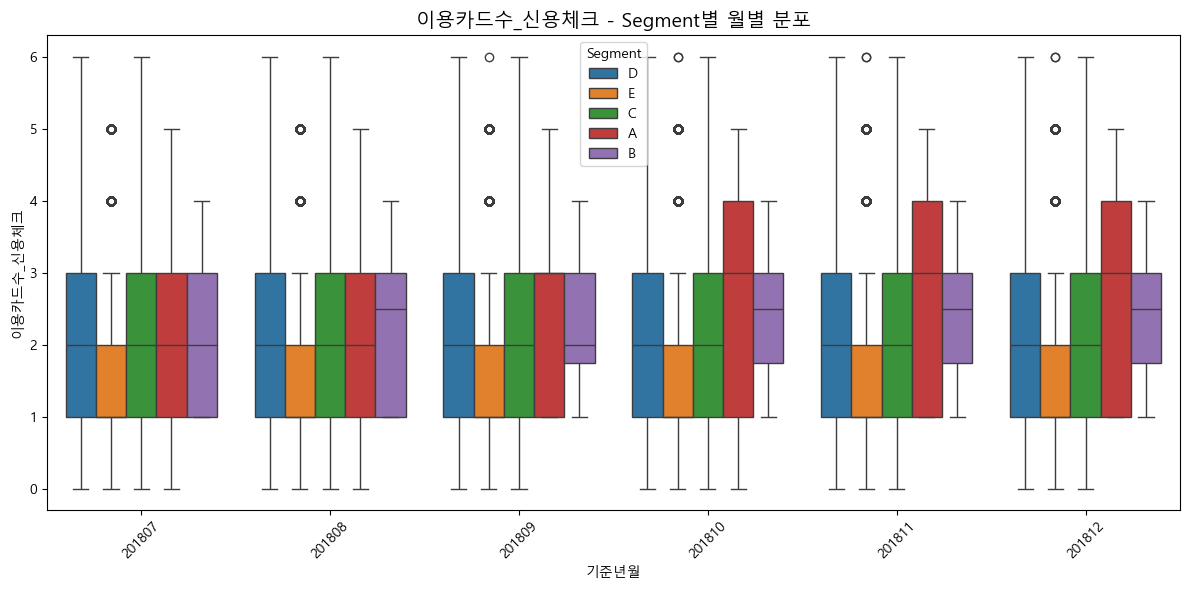

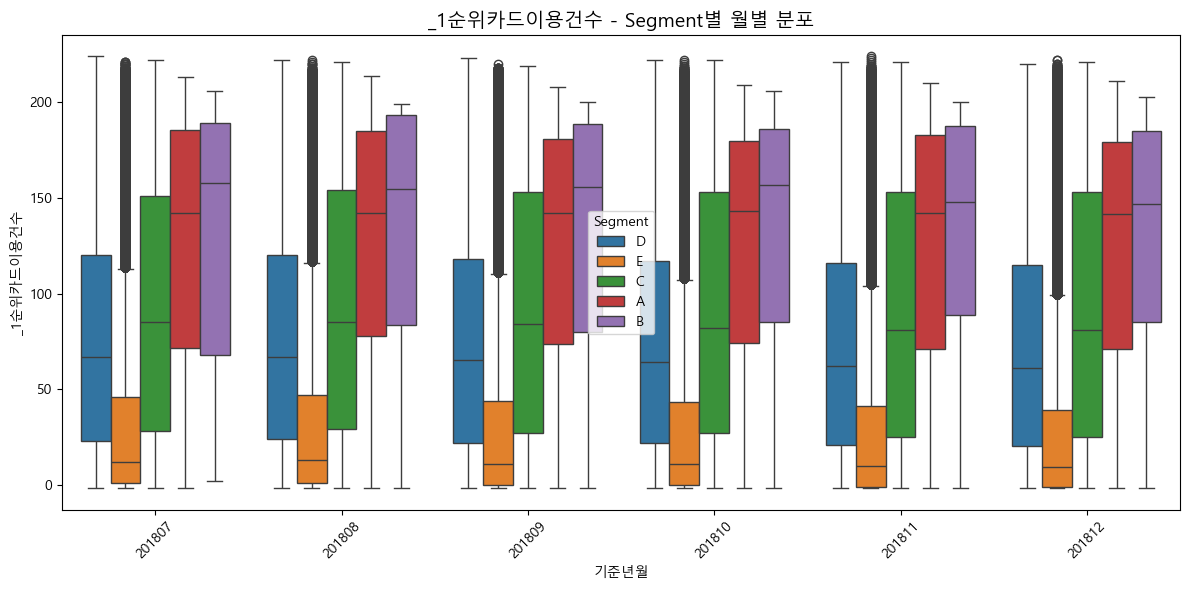

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# boxplot 시각화
vif_cols = ['이용카드수_신용체크', '_1순위카드이용건수']
segment_col = 'Segment'
month_col = '기준년월'
month_order = sorted(df[month_col].unique())  # 201807~201812

for col in vif_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=month_col, y=col, hue=segment_col, data=df, order=month_order)
    plt.title(f"{col} - Segment별 월별 분포", fontsize=14)
    plt.xlabel("기준년월")
    plt.ylabel(col)
    plt.legend(title='Segment')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


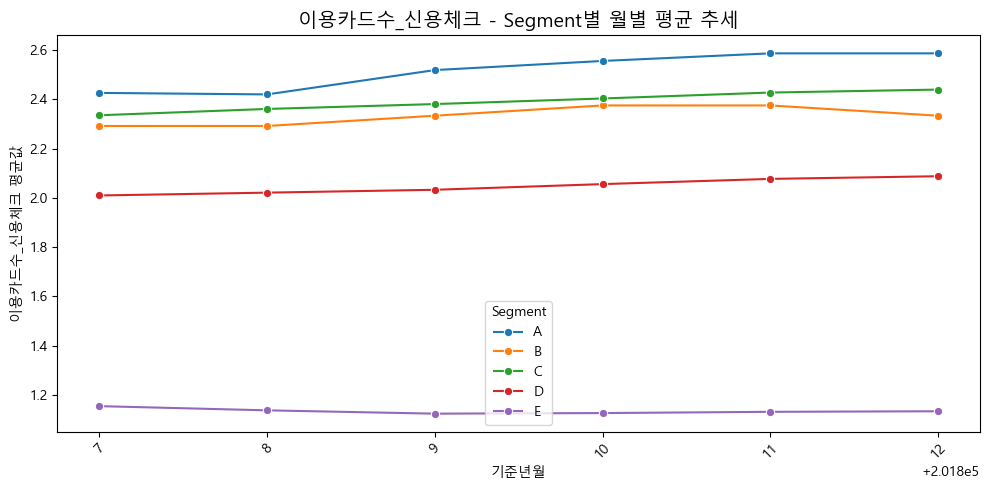

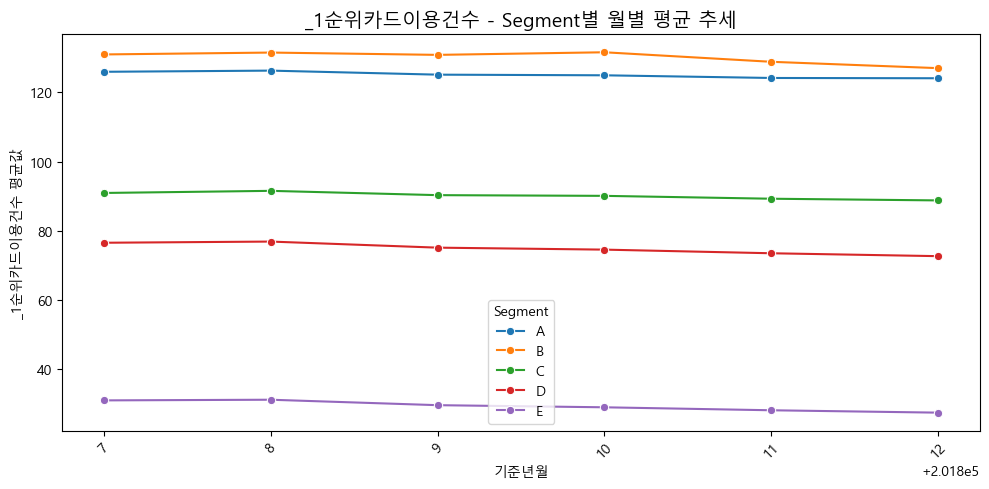

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

# 한글 폰트 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# 시각화 변수
segment_col = 'Segment'
month_col = '기준년월'
vif_cols = ['이용카드수_신용체크', '_1순위카드이용건수']
month_order = sorted(df[month_col].unique())

# 변수별 라인플롯
for col in vif_cols:
    plt.figure(figsize=(10, 5))
    
    # 월별 + Segment별 평균값 계산
    avg_df = df.groupby([month_col, segment_col])[col].mean().reset_index()
    
    # 라인플롯
    sns.lineplot(data=avg_df, x=month_col, y=col, hue=segment_col, marker='o')
    
    plt.title(f"{col} - Segment별 월별 평균 추세", fontsize=14)
    plt.xlabel("기준년월")
    plt.ylabel(f"{col} 평균값")
    plt.xticks(month_order, rotation=45)
    plt.legend(title="Segment")
    plt.tight_layout()
    plt.show()
